In [1]:
#import os pacotes utilizados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()
import prince

%matplotlib inline

In [2]:
#importando base já tratada
dados = pd.read_json('dados/dados_flat_sem_social.json')
print(dados.shape)
dados.head(3)

(7587, 16)


,LnguaPortuguesaeLiteraturaI90H,LnguaPortuguesaeLiteraturaII90H,MatemticaI120H,MatemticaII90H,ano_letivo__ano,ano_letivo__ano_matricula_periodo,cep,classe,descricao,descricao_historico,descricao_situacao_matricula_periodo,id,percentual_frequencia,pessoa_fisica__nascimento_data,pessoa_fisica__sexo,sigla
10000,72,41.0,68,0.0,2015,2015,59215-000,1,Matriculado,Técnico de Nível Médio em Administração,Dependência,464291724941,92.0,10/08/1999,M,NC
10001,73,68.0,70,0.0,2017,2015,59255-000,1,Matriculado,Técnico de Nível Médio em Administração,Dependência,573829066825,100.0,26/07/2000,F,NC
10002,66,NaN,60,NaN,2016,2016,59219-000,1,Matriculado,Técnico de Nível Médio em Administração,Dependência,503648996253,100.0,25/01/2001,M,NC


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


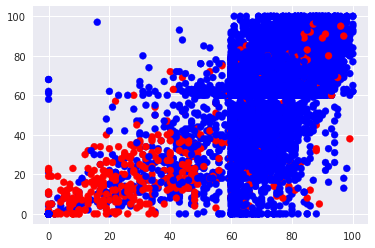

In [16]:
#plot eixo y media do primeiro ano, eixo x media do segundo. cores representando evasao ou nao
colors = ['red','blue']
plt.scatter(dados.loc[:, 'LnguaPortuguesaeLiteraturaI90H'], 
            dados.loc[:, 'MatemticaI120H'], 
            c=dados['classe'], 
            cmap=matplotlib.colors.ListedColormap(colors))

In [17]:
nota_1 = dados[['LnguaPortuguesaeLiteraturaI90H', 'LnguaPortuguesaeLiteraturaII90H']].mean(axis=1)
nota_2 = dados[['MatemticaI120H', 'MatemticaII90H']].mean(axis=1)

dados['1_ano'] = nota_1
dados['2_ano'] = nota_2

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


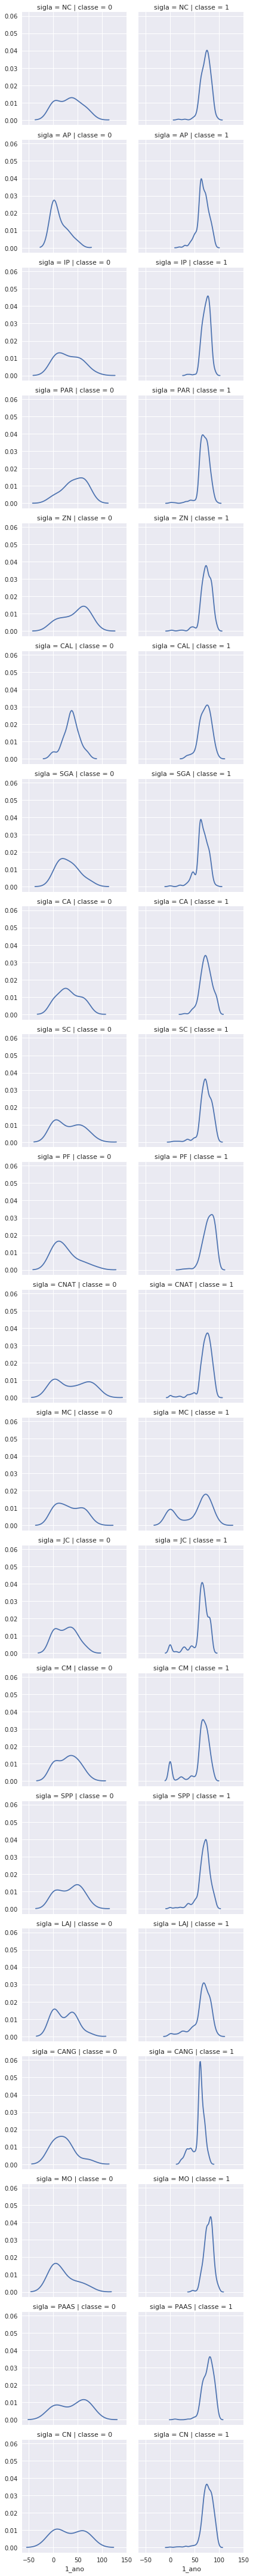

In [19]:
g = sns.FacetGrid(dados, col="classe",  row="sigla")
g = g.map(sns.kdeplot, "1_ano")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


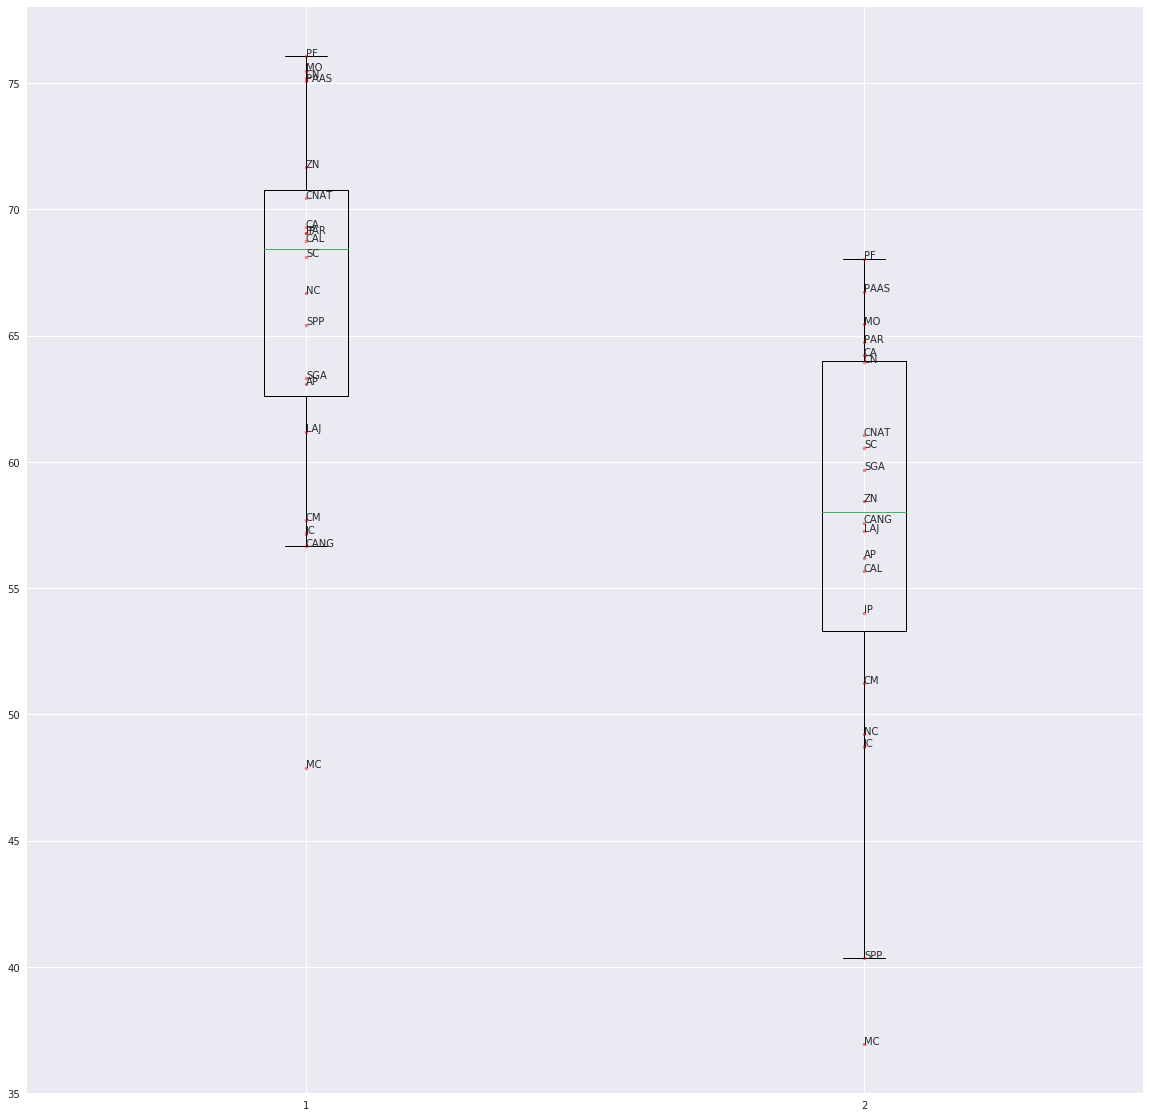

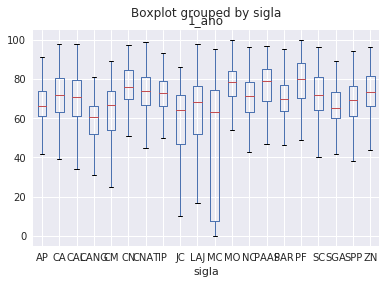

In [20]:
data_plot = [dados.groupby('sigla')['1_ano'].mean(), dados.groupby('sigla')['2_ano'].mean()]

fig, ax = plt.subplots(figsize=(20, 20))
plt.boxplot(data_plot)
plt.plot([1, 2], [dados.groupby('sigla')['1_ano'].mean(), dados.groupby('sigla')['2_ano'].mean()], 'r.', alpha=0.5)


for i, txt in enumerate( dados.groupby('sigla')['1_ano'].mean().index ):
    ax.annotate( txt, (1, dados.groupby('sigla')['1_ano'].mean()[i]), fontsize=10)
    ax.annotate( txt, (2, dados.groupby('sigla')['2_ano'].mean()[i]) )


fig = plt.figure()
dados.boxplot(column='1_ano',by='sigla')

[0.92041522491349481, 0.89494163424124518, 0.91712707182320441, 0.9494949494949495, 0.88990825688073394, 0.96995708154506433, 0.9305210918114144, 0.89344262295081966, 0.83458646616541354, 0.88996763754045305, 0.84530386740331487, 0.95016611295681064, 0.84912280701754383, 0.92758620689655169, 0.97123893805309736, 0.93956043956043955, 0.87850467289719625, 0.93253968253968256, 0.89156626506024095, 0.92873563218390809]


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


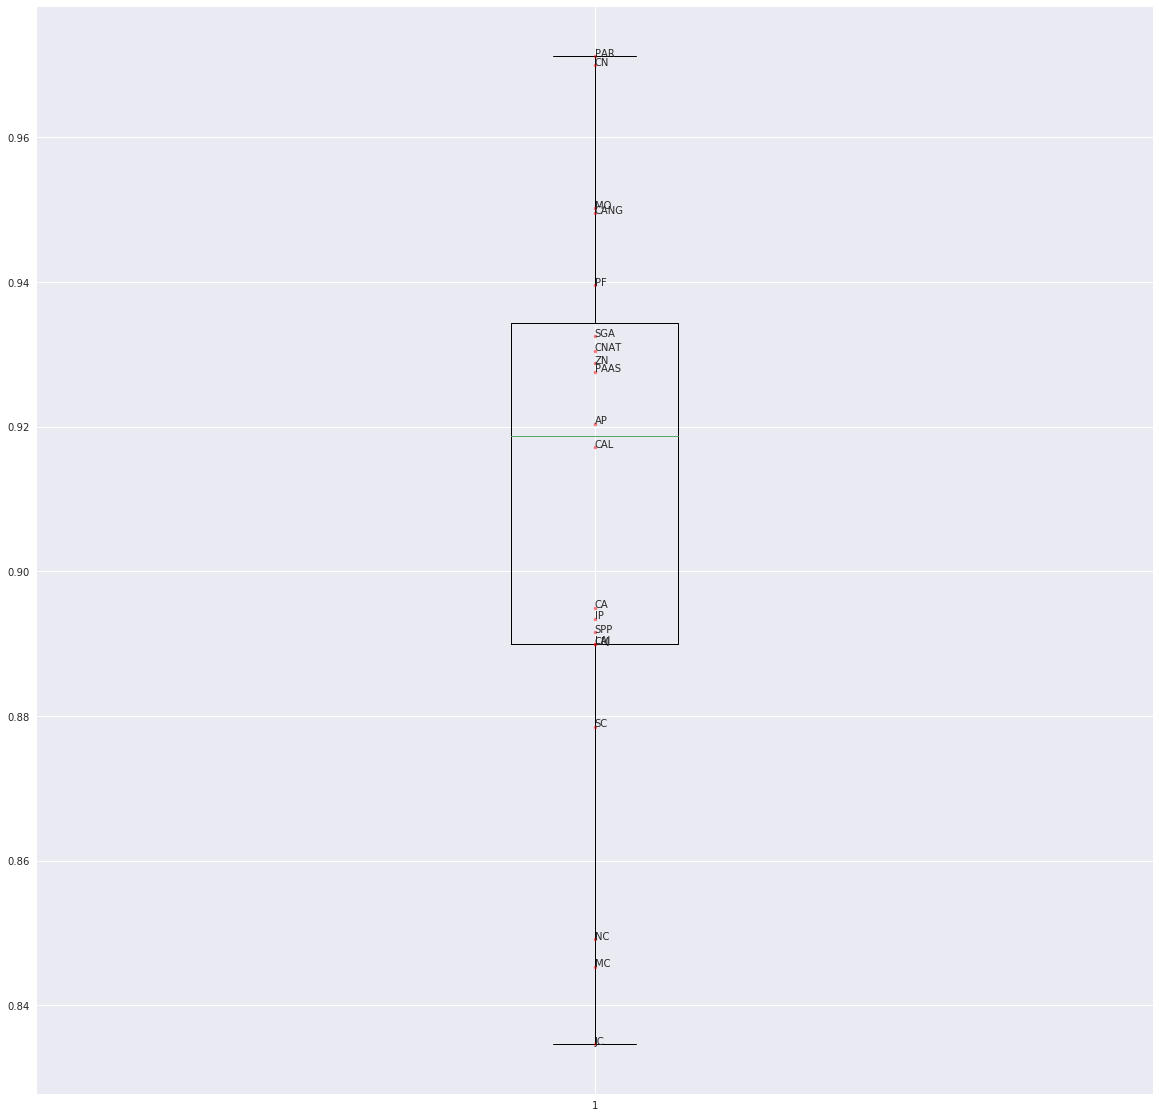

In [4]:
#print(dados.groupby(['sigla', 'classe']).describe())
data_plot = []
ind = []

for index1, group1 in dados.groupby(['sigla']):    
    
    qnt_alunos = dados[dados.sigla == index1]['sigla'].count()
    qnt_evasao = dados[(dados.sigla == index1) & (dados.classe == 0)]['sigla'].count()
    tx_evasao  = 1 - qnt_evasao/qnt_alunos
    
    ind.append(index1)
    data_plot.append(tx_evasao)
    
print(data_plot)

fig, ax = plt.subplots(figsize=(20, 20))
plt.boxplot(data_plot)
#plt.plot([1], data_plot, 'r.', alpha=0.5)
plt.plot(np.ones(len(data_plot)), data_plot, 'r.', alpha=0.5)

for i, txt in enumerate( ind ):
    ax.annotate( txt, (1, data_plot[i]), fontsize=10)

In [5]:
sumario_campus = pd.DataFrame()
sumario_campus['LAT'] = ind
sumario_campus['LNG'] = ind
sumario_campus['NOME'] = ind
sumario_campus['tx_evasao'] = data_plot
sumario_campus.index = ind

sumario_campus.loc['AP','LAT'] = -5.626647
sumario_campus.loc['AP','LNG'] = -37.8079408
sumario_campus.loc['AP','NOME'] = 'Apodi'

sumario_campus.loc['CA','LAT'] = -6.4455399
sumario_campus.loc['CA','LNG'] = -37.0690543
sumario_campus.loc['CA','NOME'] = 'Caicó'

sumario_campus.loc['CAL','LAT'] = -5.7882761
sumario_campus.loc['CAL','LNG'] = -35.207484
sumario_campus.loc['CAL','NOME'] = 'Cidade Alta'

sumario_campus.loc['CANG','LAT'] = -6.356481
sumario_campus.loc['CANG','LNG'] = -35.16137
sumario_campus.loc['CANG','NOME'] = 'Canguaretama'

sumario_campus.loc['CM','LAT'] = -5.6526002
sumario_campus.loc['CM','LNG'] = -35.4289211
sumario_campus.loc['CM','NOME'] = 'Ceará-Mirim'

sumario_campus.loc['CN','LAT'] = -6.2522742
sumario_campus.loc['CN','LNG'] = -36.5355755
sumario_campus.loc['CN','NOME'] = 'Currais Novos'

sumario_campus.loc['CNAT','LAT'] = -5.8116998
sumario_campus.loc['CNAT','LNG'] = -35.2032445
sumario_campus.loc['CNAT','NOME'] = 'Natal'

sumario_campus.loc['IP','LAT'] = -5.535475
sumario_campus.loc['IP','LNG'] = -36.870884
sumario_campus.loc['IP','NOME'] = 'Ipanguaçu'

sumario_campus.loc['JC','LAT'] = -5.5445745
sumario_campus.loc['JC','LNG'] = -35.7977312
sumario_campus.loc['JC','NOME'] = 'João Câmara'

sumario_campus.loc['LAJ','LAT'] = -5.7045319
sumario_campus.loc['LAJ','LNG'] = -36.2354056
sumario_campus.loc['LAJ','NOME'] = 'Lajes'

sumario_campus.loc['MC','LAT'] = -5.1519506
sumario_campus.loc['MC','LNG'] = -36.5749401
sumario_campus.loc['MC','NOME'] = 'Macau'

sumario_campus.loc['MO','LAT'] = -5.2137844
sumario_campus.loc['MO','LNG'] = -37.3193046
sumario_campus.loc['MO','NOME'] = 'Mossoró'

sumario_campus.loc['NC','LAT'] = -6.4705831
sumario_campus.loc['NC','LNG'] = -35.4449409
sumario_campus.loc['NC','NOME'] = 'Nova Cruz'

sumario_campus.loc['PAAS','LAT'] = -6.6996818
sumario_campus.loc['PAAS','LNG'] = -36.6674975
sumario_campus.loc['PAAS','NOME'] = 'Parelhas'

sumario_campus.loc['PAR','LAT'] = -5.938754
sumario_campus.loc['PAR','LNG'] = -35.2664888
sumario_campus.loc['PAR','NOME'] = 'Parnamirim'

sumario_campus.loc['PF','LAT'] = -6.1457562
sumario_campus.loc['PF','LNG'] = -38.2037518
sumario_campus.loc['PF','NOME'] = 'Pau dos Ferros'

sumario_campus.loc['SC','LAT'] = -6.2278238
sumario_campus.loc['SC','LNG'] = -36.0270737
sumario_campus.loc['SC','NOME'] = 'Santa Cruz'

sumario_campus.loc['SGA','LAT'] = -5.7242691
sumario_campus.loc['SGA','LNG'] = -35.2404887
sumario_campus.loc['SGA','NOME'] = 'São Gonçalo do Amarante'

sumario_campus.loc['SPP','LAT'] = -5.8954807
sumario_campus.loc['SPP','LNG'] = -35.7544978
sumario_campus.loc['SPP','NOME'] = 'São Paulo do Potengi'

sumario_campus.loc['ZN','LAT'] = -5.7491553
sumario_campus.loc['ZN','LNG'] = -35.2602211
sumario_campus.loc['ZN','NOME'] = 'Zona norte'


sumario_campus

,LAT,LNG,NOME,tx_evasao
AP,-5.62665,-37.8079,Apodi,0.920415
CA,-6.44554,-37.0691,Caicó,0.894942
CAL,-5.78828,-35.2075,Cidade Alta,0.917127
CANG,-6.35648,-35.1614,Canguaretama,0.949495
CM,-5.6526,-35.4289,Ceará-Mirim,0.889908
CN,-6.25227,-36.5356,Currais Novos,0.969957
CNAT,-5.8117,-35.2032,Natal,0.930521
IP,-5.53547,-36.8709,Ipanguaçu,0.893443
JC,-5.54457,-35.7977,João Câmara,0.834586
LAJ,-5.70453,-36.2354,Lajes,0.889968


In [2]:
import geocoder

g = geocoder.google('59080-445')

print('({}, {})'.format(g.lat, g.lng))

(-5.856645599999999, -35.2102507)


In [3]:
import folium
from folium.plugins import HeatMap
from folium import plugins

In [4]:
# Create a map object

m = folium.Map(
    location=[-5.817691, -36.445725],
    zoom_start=8,
    tiles='Stamen Terrain'
)

# Dictionary for colors
unit_type_colors = {
    1: 'green',
    0: 'red',
}

# Dictionary for icons
unit_type_icons = {
    'Elem': 'graduation-cap',
    'KGAR': 'odnoklassniki',
}

In [64]:
# Ploting the educational units on map

for index, row in sumario_campus.iterrows():
    folium.Marker([row['LAT'], row['LNG']],
                  icon=folium.Icon(
                          color = 'green',
                          #icon = 'graduation-cap',
                          prefix='fa'),
                  popup = index
        ).add_to(m)

# Add fullscreen button
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m

In [67]:
dados.head(1)

,LnguaPortuguesaeLiteraturaI90H,LnguaPortuguesaeLiteraturaII90H,MatemticaI120H,MatemticaII90H,ano_letivo__ano,ano_letivo__ano_matricula_periodo,cep,classe,descricao,descricao_historico,descricao_situacao_matricula_periodo,id,percentual_frequencia,pessoa_fisica__nascimento_data,pessoa_fisica__sexo,sigla
10000,72,41.0,68,0.0,2015,2015,59215-000,1,Matriculado,Técnico de Nível Médio em Administração,Dependência,464291724941,92.0,10/08/1999,M,NC


In [12]:
import geocoder
#g = geocoder.google('59080-445')
#print('({}, {})'.format(g.lat, g.lng))

cont = 1

for index, row in dados.iterrows():
    g = geocoder.google(row['cep'])
    lat = g.lat
    lng = g.lnt
    
    if g.error:
        lat = sumario_campus.loc[row['sigla'],'LAT']
        lng = sumario_campus.loc[row['sigla'],'LNG']
        
    cont = cont + 1        
    if cont > 10:
        break
        #continue
    
    folium.Marker([lat, lng],
                  icon=folium.Icon(
                          color = unit_type_colors[row['classe']],
                          #icon = 'graduation-cap',
                          prefix='fa'),
                  #popup = index
        ).add_to(m)

# Add fullscreen button
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m

Status code 400 from https://maps.googleapis.com/maps/api/geocode/json: ERROR - 400 Client Error: Bad Request for url: https://maps.googleapis.com/maps/api/geocode/json?address=&bounds=&components=&region=&language=
Status code 400 from https://maps.googleapis.com/maps/api/geocode/json: ERROR - 400 Client Error: Bad Request for url: https://maps.googleapis.com/maps/api/geocode/json?address=&bounds=&components=&region=&language=
Status code 400 from https://maps.googleapis.com/maps/api/geocode/json: ERROR - 400 Client Error: Bad Request for url: https://maps.googleapis.com/maps/api/geocode/json?address=&bounds=&components=&region=&language=
Status code 400 from https://maps.googleapis.com/maps/api/geocode/json: ERROR - 400 Client Error: Bad Request for url: https://maps.googleapis.com/maps/api/geocode/json?address=&bounds=&components=&region=&language=
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To chang

In [22]:
import os
import folium
import json
import pandas as pd
from branca.colormap import linear
import numpy as np
#from shapely.geometry import Polygon
#from shapely.geometry import Point
from numpy import random

# load the data and use 'latin-1'encoding because the accent
geo_json_data = json.load(open('geojson/geojs-24-mun.json',encoding='latin-1'))

In [27]:
#geo_json_data

cities = []
# list all cities in the state
for city in geo_json_data['features']:
        cities.append(city['properties']['description'])
cities

['Acari',
 'Açu',
 'Afonso Bezerra',
 'Água Nova',
 'Alexandria',
 'Almino Afonso',
 'Alto do Rodrigues',
 'Angicos',
 'Antônio Martins',
 'Apodi',
 'Areia Branca',
 'Arês',
 'Augusto Severo',
 'Baía Formosa',
 'Baraúna',
 'Barcelona',
 'Bento Fernandes',
 'Bodó',
 'Bom Jesus',
 'Brejinho',
 'Caiçara do Norte',
 'Caiçara do Rio do Vento',
 'Caicó',
 'Campo Redondo',
 'Canguaretama',
 'Caraúbas',
 'Carnaúba dos Dantas',
 'Carnaubais',
 'Ceará-Mirim',
 'Cerro Corá',
 'Coronel Ezequiel',
 'Coronel João Pessoa',
 'Cruzeta',
 'Currais Novos',
 'Doutor Severiano',
 'Parnamirim',
 'Encanto',
 'Equador',
 'Espírito Santo',
 'Extremoz',
 'Felipe Guerra',
 'Fernando Pedroza',
 'Florânia',
 'Francisco Dantas',
 'Frutuoso Gomes',
 'Galinhos',
 'Goianinha',
 'Governador Dix-Sept Rosado',
 'Grossos',
 'Guamaré',
 'Ielmo Marinho',
 'Ipanguaçu',
 'Ipueira',
 'Itajá',
 'Itaú',
 'Jaçanã',
 'Jandaíra',
 'Janduís',
 'Januário Cicco',
 'Japi',
 'Jardim de Angicos',
 'Jardim de Piranhas',
 'Jardim do Seridó

In [28]:
# Create a map object
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=7,
    tiles='Stamen Terrain'
)

# Configure geojson layer
folium.GeoJson(geo_json_data).add_to(m)

m

In [29]:
colormap = linear.YlGn.scale(
    sumario_campus.tx_evasao.min(),
    sumario_campus.tx_evasao.max())

print(colormap(5000.0))

#005a32


In [55]:
sumario_campus['tx_evasao'] = 1 - sumario_campus['tx_evasao']

In [61]:
# Create a map object
m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=7,
    tiles='Stamen Terrain'
)

# create a threshold of legend
threshold_scale = np.linspace(sumario_campus.tx_evasao.min(),
                              sumario_campus.tx_evasao.max(), 6, dtype=int).tolist()


for index, row in sumario_campus.iterrows():
    folium.Marker([row['LAT'], row['LNG']],
                  icon=folium.Icon(
                          color = 'green',
                          #icon = 'graduation-cap',
                          prefix='fa'),
                  popup = '({}, {})'.format(index, row['tx_evasao'])
        ).add_to(m)

m.choropleth(
    geo_data=geo_json_data,
    data=sumario_campus,
    columns=['NOME', 'tx_evasao'],
    key_on='feature.properties.description',
    fill_color='YlOrRd',
    legend_name='Taxa de Sucesso',
    highlight=True,
    #threshold_scale = threshold_scale
)

m

In [34]:
threshold_scale

[0, 0, 0, 0, 0, 0]

# Análise dos alunos do 1º ano

In [3]:
#importando base já tratada
dados = pd.read_json('dados/dados_flat_COM_social.json')
print(dados.shape)
dados.head(3)

(7520, 29)


,LnguaPortuguesaeLiteraturaI90H,LnguaPortuguesaeLiteraturaII90H,MatemticaI120H,MatemticaII90H,ano_letivo__ano,ano_letivo__ano_matricula_periodo,cep,classe,descricao,descricao_area_residencial,...,descricao_trabalho_responsavel,id,nome_escola_ensino_fundamental,percentual_frequencia,pessoa_fisica__nascimento_data,pessoa_fisica__sexo,qnt_pc,qtd_pessoas_domicilio,renda_bruta_familiar,sigla
34217,68,68.0,66,79.0,2015,2015,59535-000,1,Matriculado,Urbana,...,Não informado,457884597605,ESCOLA MUNICIPAL DR. ELOY DE SOUZA,100.0,22/10/1999,F,0.0,2,300.0,LAJ
34218,73,21.0,23,7.0,2015,2015,59460-000,0,Cancelado,Urbana,...,Não informado,458436647741,,91.0,04/10/1997,M,1.0,2,0.0,SPP
34219,70,80.0,61,73.0,2015,2015,59810-000,1,Matriculado,Urbana,...,Autônomo,452768375385,,98.0,05/07/1999,F,0.0,6,720.0,PF


In [19]:
dados.groupby(['descricao', 'ano_letivo__ano'])['LnguaPortuguesaeLiteraturaI90H'].aggregate([np.mean, np.size]).unstack()

mean                          size  \
ano_letivo__ano                       2015       2016       2017    2015   
descricao                                                                  
Cancelado                        53.274336  26.087719  12.395833   113.0   
Cancelamento Compulsório         24.571429  13.785714  10.666667     7.0   
Concluído                        73.166667  66.000000  74.000000    18.0   
Evasão                           37.246575  20.392523  36.500000   219.0   
Matriculado                      73.695200  70.387621  67.879730  2500.0   
Matrícula Vínculo Institucional        NaN  11.000000        NaN     NaN   

                                                 
ano_letivo__ano                    2016    2017  
descricao                                        
Cancelado                         114.0    48.0  
Cancelamento Compulsório           14.0     3.0  
Concluído                           1.0     1.0  
Evasão                            107.0     2.0  
Matriculado                      2892.0  1480.0  
Matrícula Vínculo Institucional     1.0     NaN

In [21]:
dados.groupby(['classe', 'ano_letivo__ano'])['LnguaPortuguesaeLiteraturaI90H'].aggregate([np.mean, np.size]).unstack()

mean                        size            
ano_letivo__ano       2015       2016       2017  2015  2016  2017
classe                                                            
0                42.327434  22.761702  13.207547   339   235    53
1                73.691422  70.365584  67.883862  2518  2894  1481

In [22]:
dados.groupby(['classe', 'descricao'])['LnguaPortuguesaeLiteraturaI90H'].aggregate([np.mean, np.size]).unstack()

mean                                                \
descricao  Cancelado Cancelamento Compulsório Concluído     Evasão   
classe                                                               
0          34.869091                16.541667       NaN  31.743902   
1                NaN                      NaN     72.85        NaN   

                                                           size  \
descricao Matriculado Matrícula Vínculo Institucional Cancelado   
classe                                                            
0                 NaN                             NaN     275.0   
1           71.050786                            11.0       NaN   

                                                                 \
descricao Cancelamento Compulsório Concluído Evasão Matriculado   
classe                                                            
0                             24.0       NaN  328.0         NaN   
1                              NaN      20.0    NaN      6872.0   

                                           
descricao Matrícula Vínculo Institucional  
classe                                     
0                                     NaN  
1                                     1.0

# Tabela de contigência 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


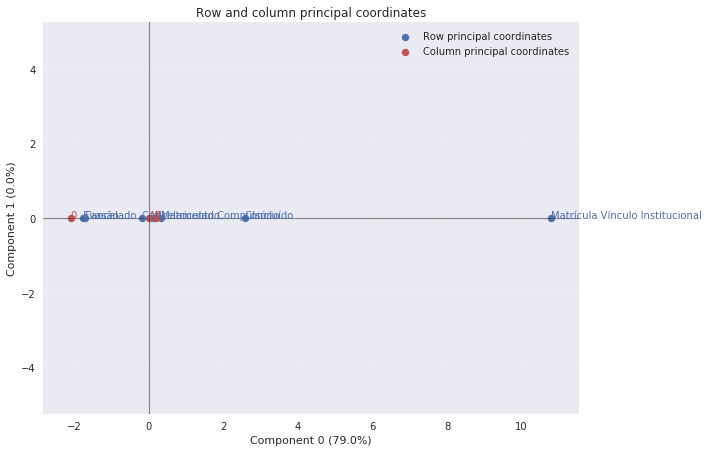

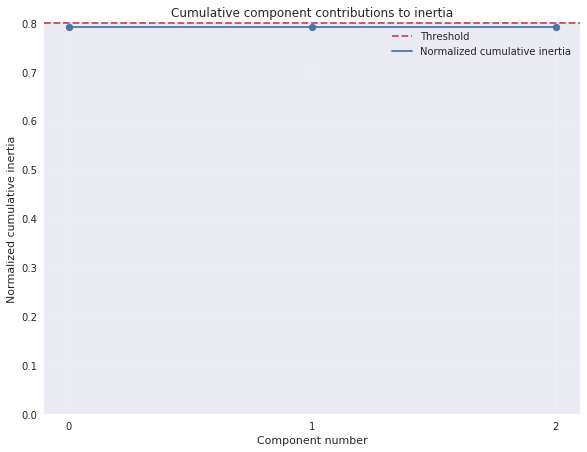

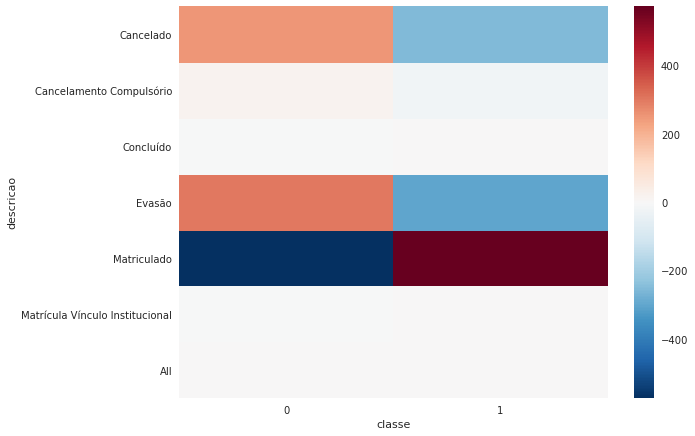

In [13]:
#tabela de contigencia
tbl = pd.crosstab(index = dados.descricao , columns = dados.classe, margins=True)
tbl

#analise de correspondencia
ca = prince.CA(tbl, n_components=-1)

fig = plt.figure()
fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)

ca.plot_cumulative_inertia()

#matriz residual
res = (ca.P - ca.expected_frequencies) * ca.N
res

f, ax = plt.subplots()
df = res.drop(['All'], axis=1)
sns.heatmap(df)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


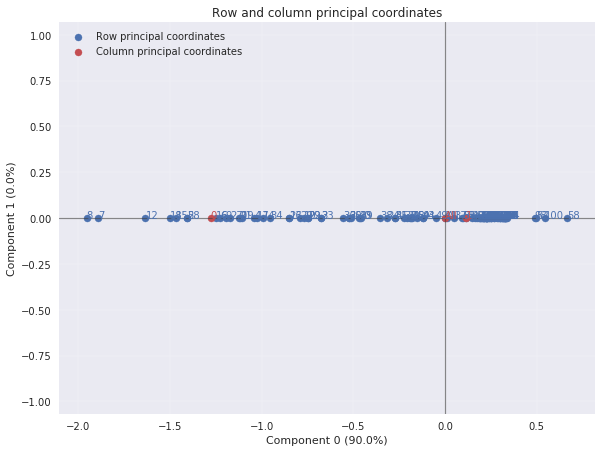

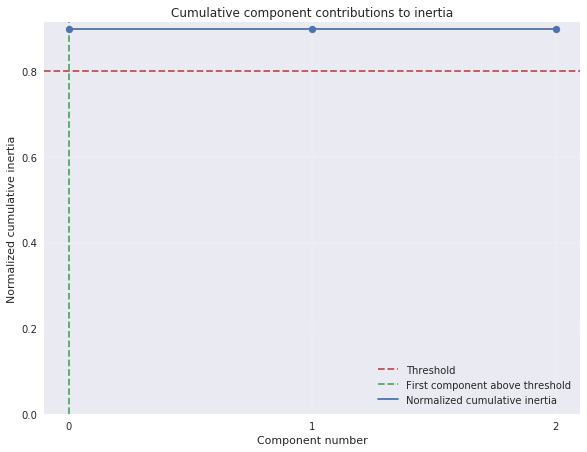

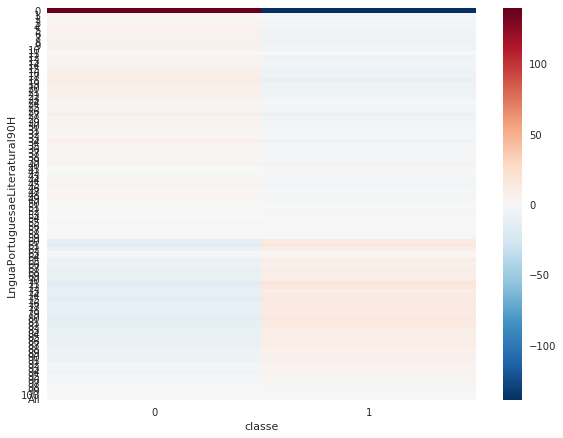

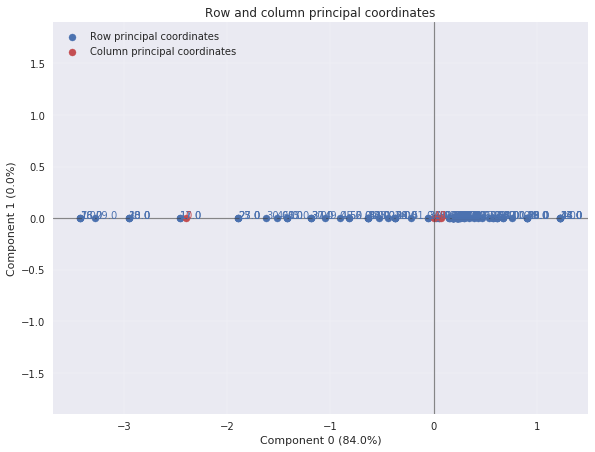

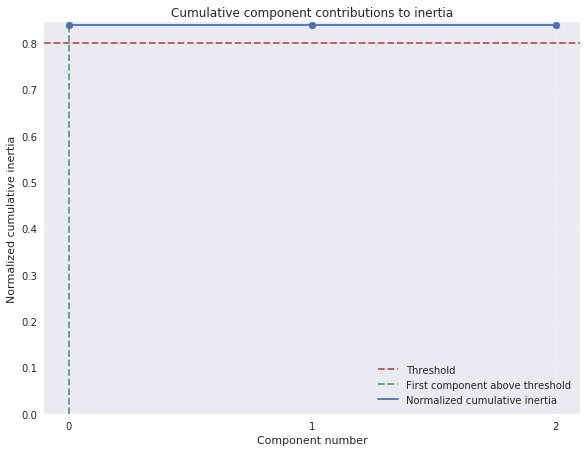

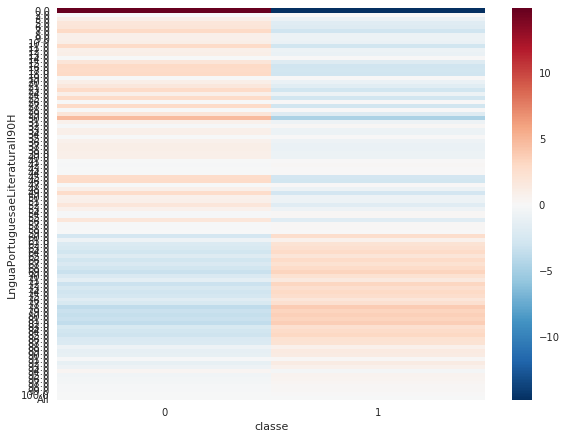

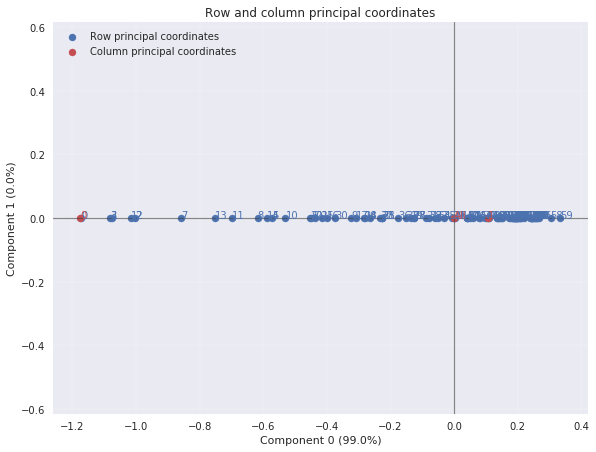

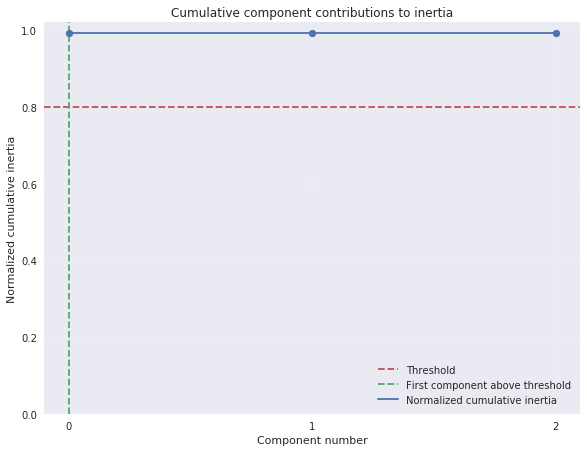

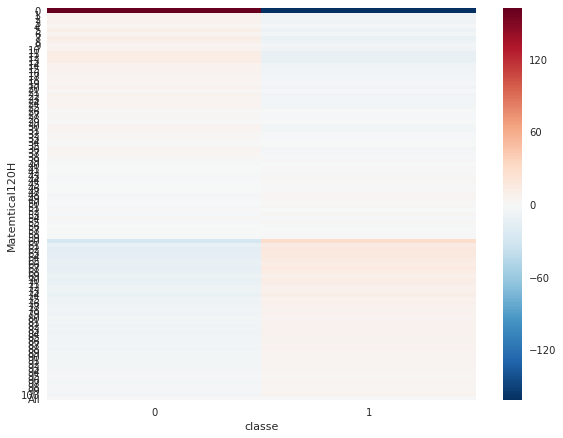

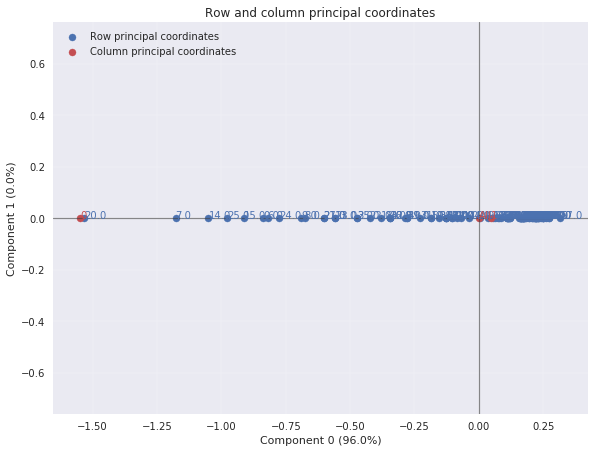

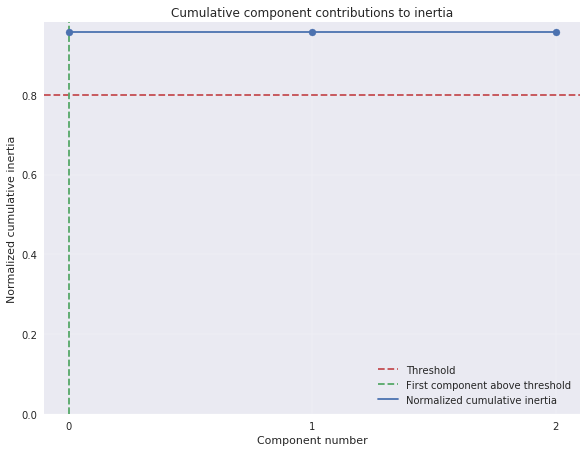

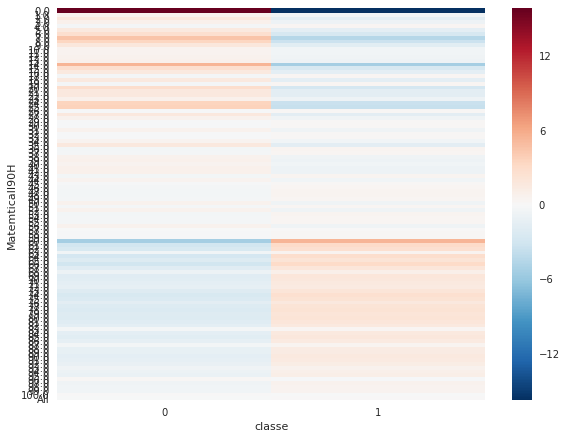

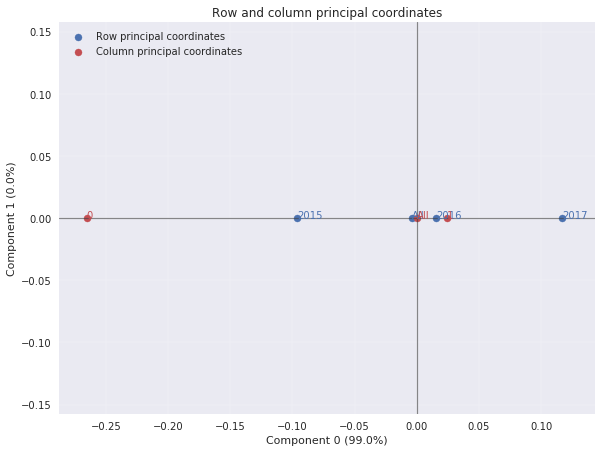

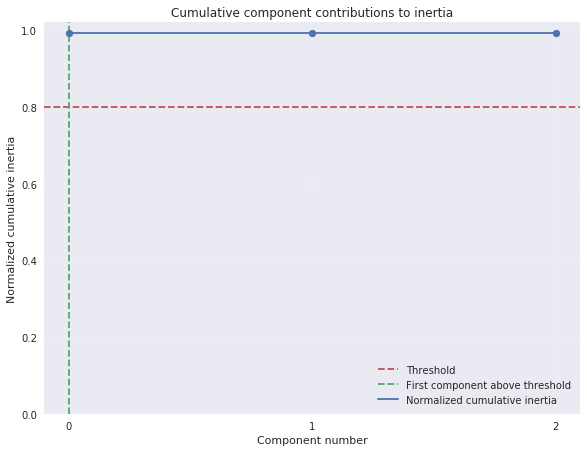

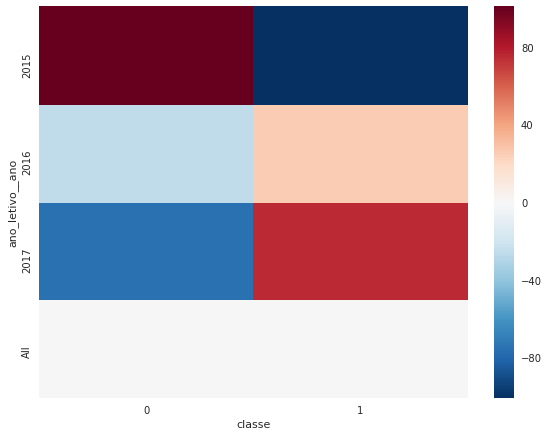

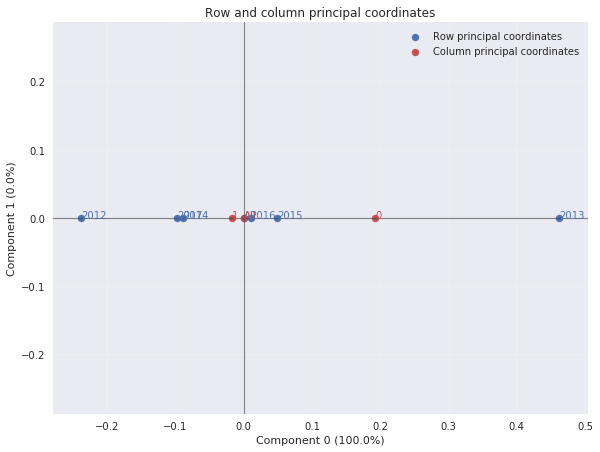

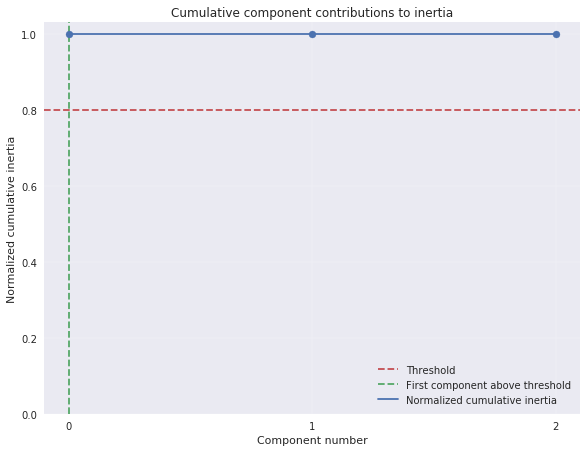

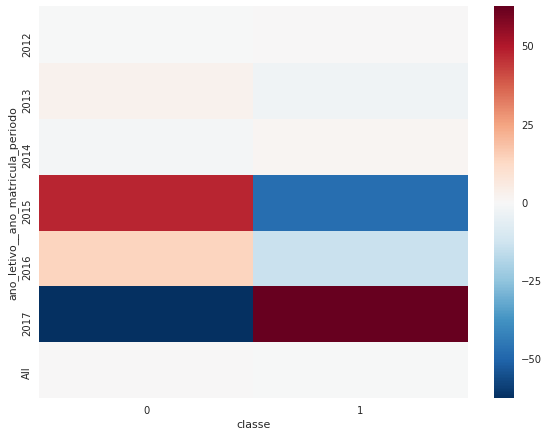

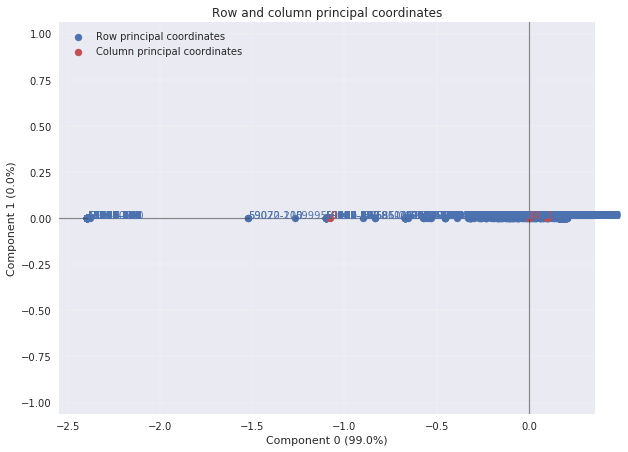

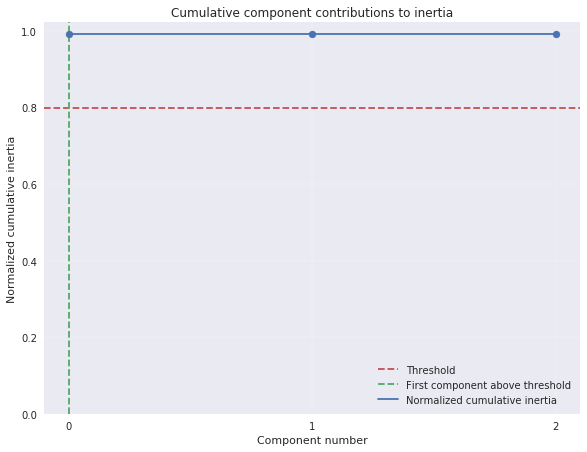

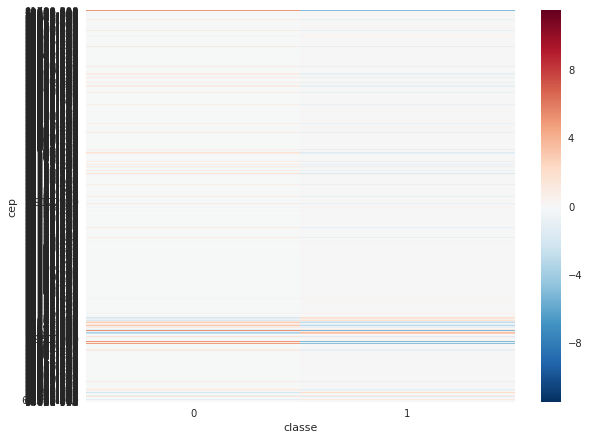

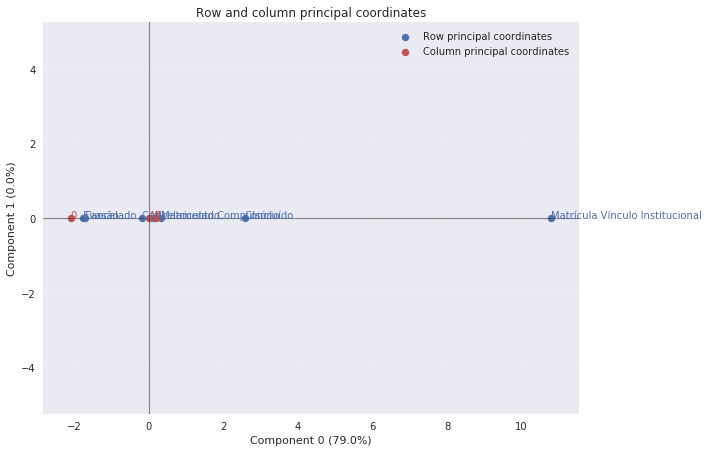

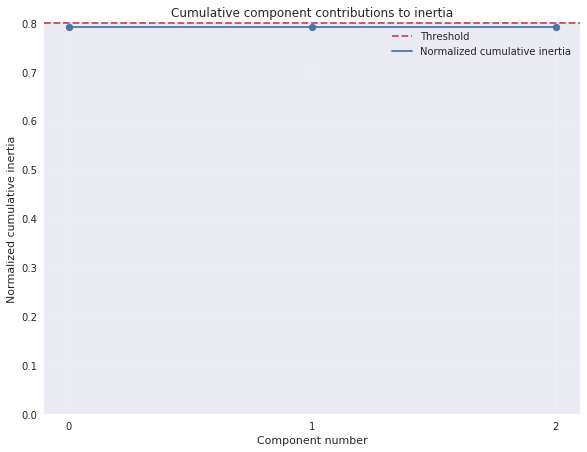

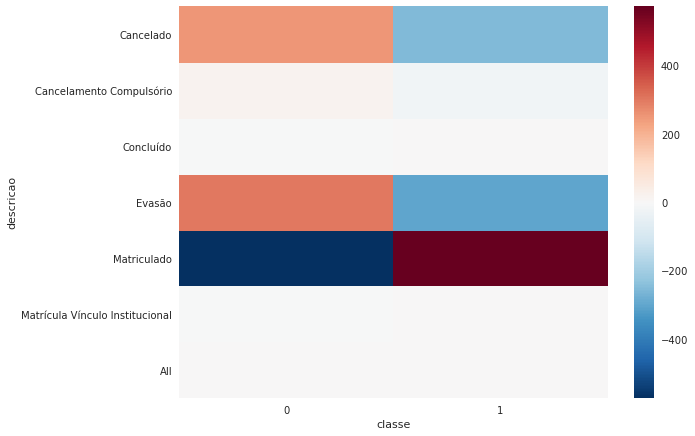

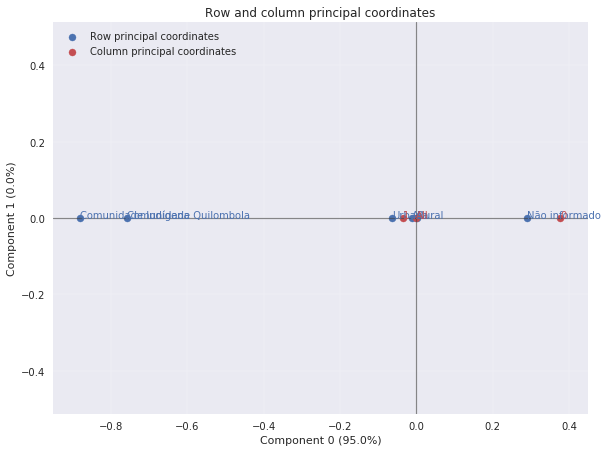

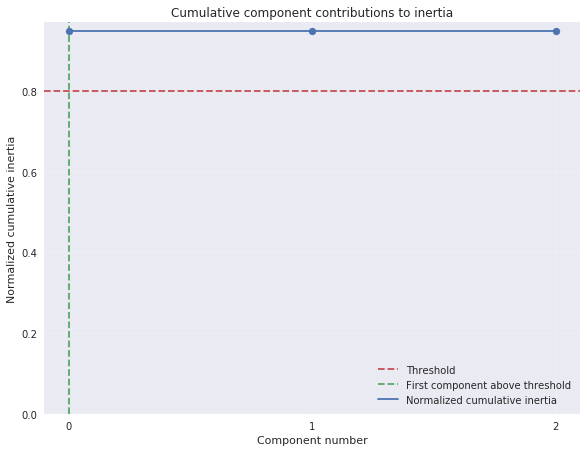

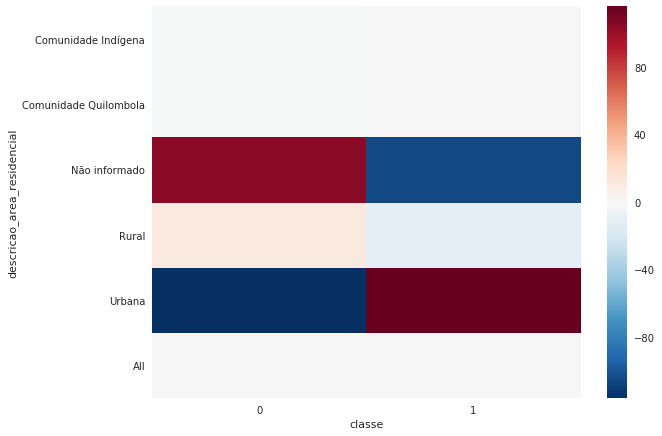

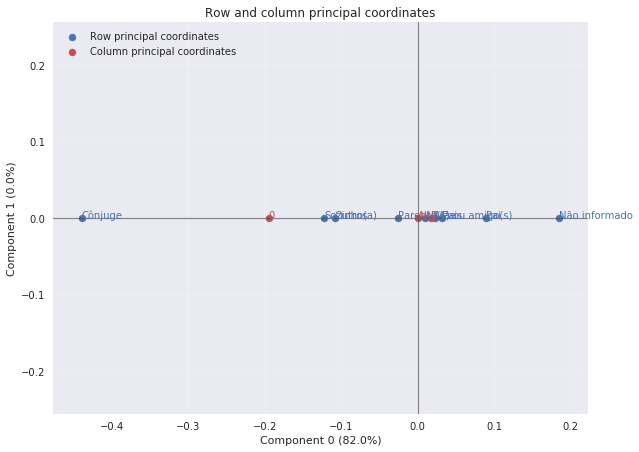

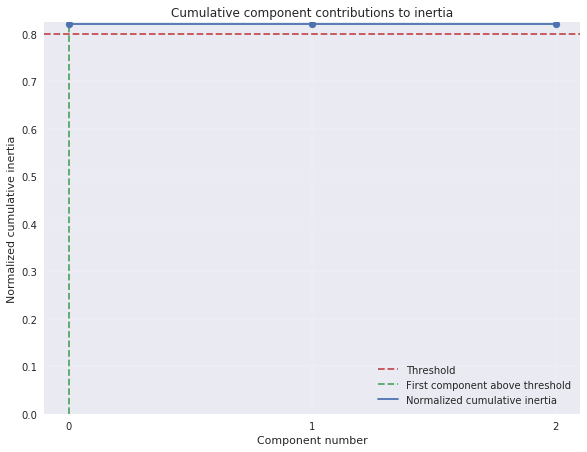

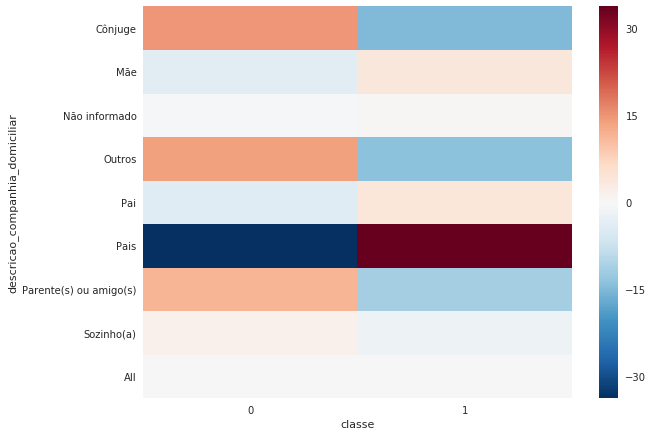

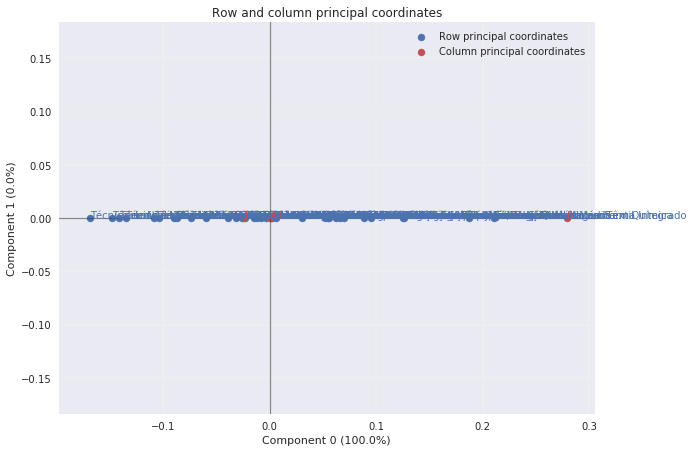

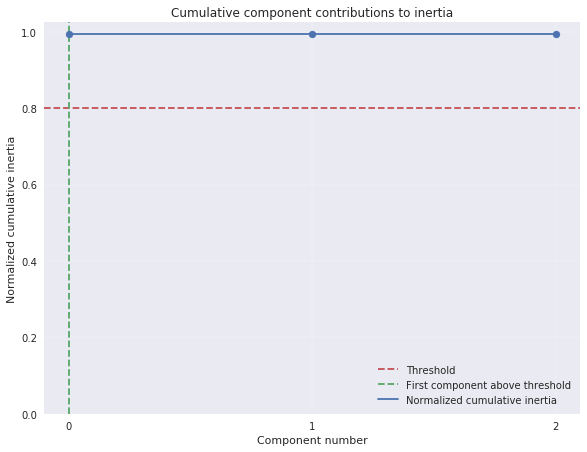

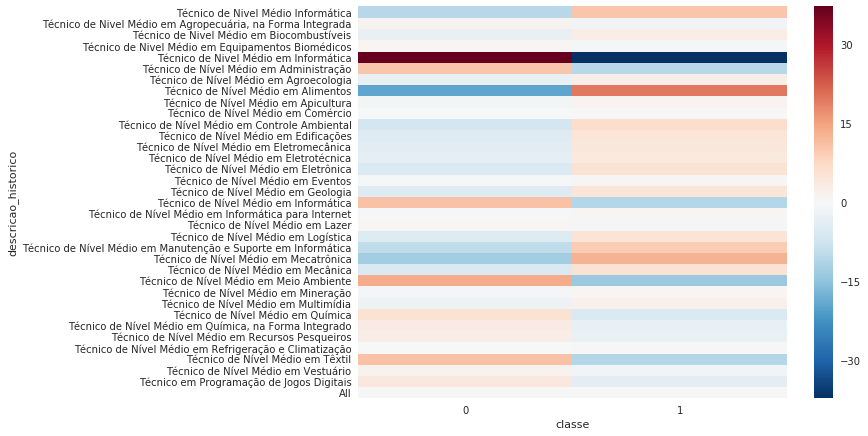

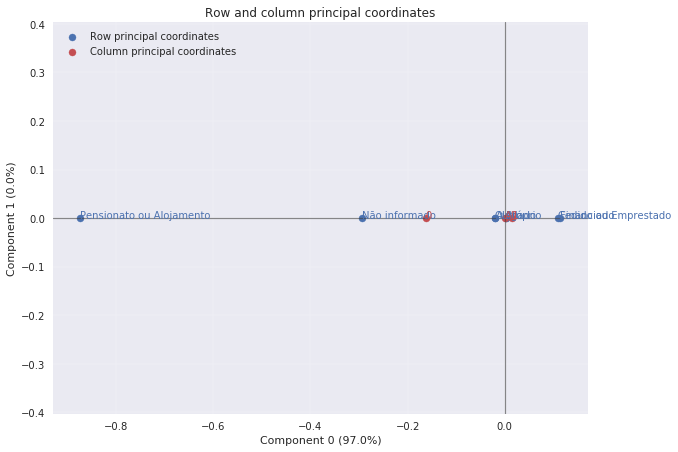

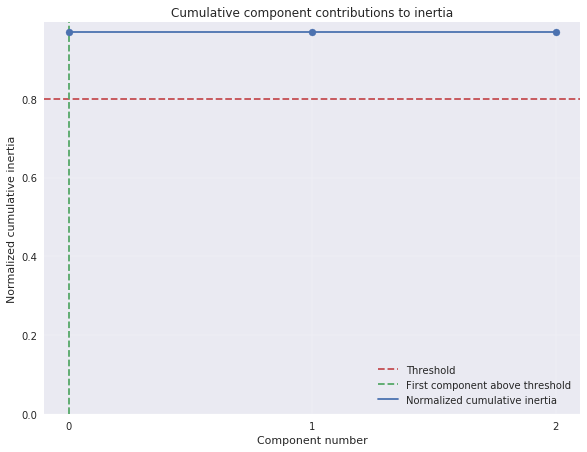

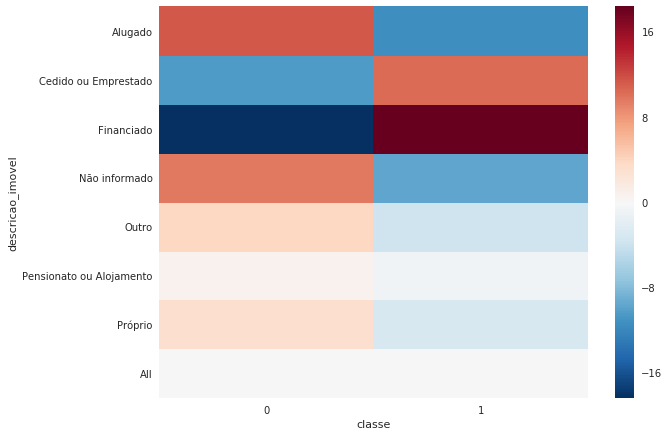

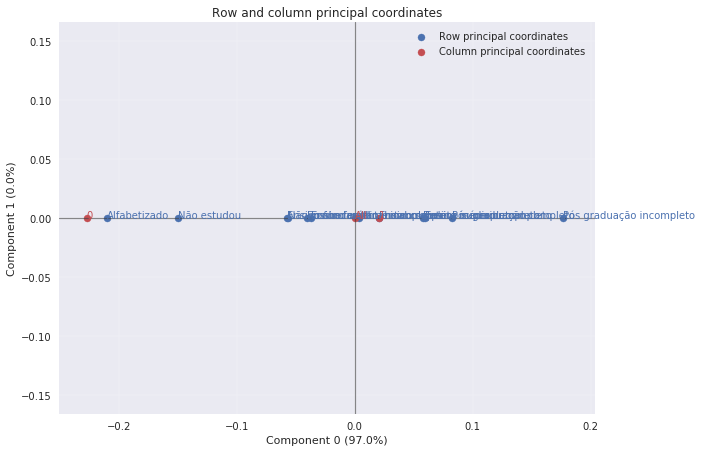

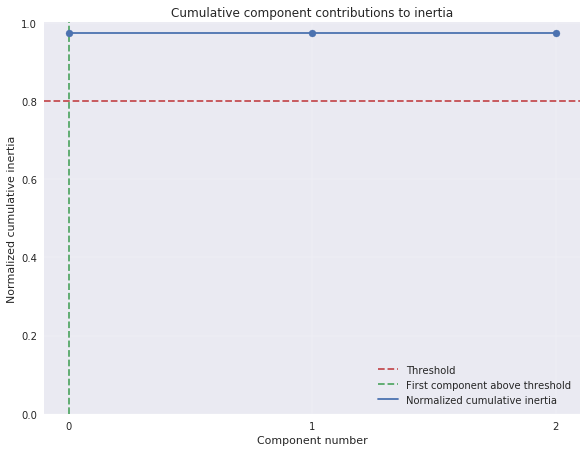

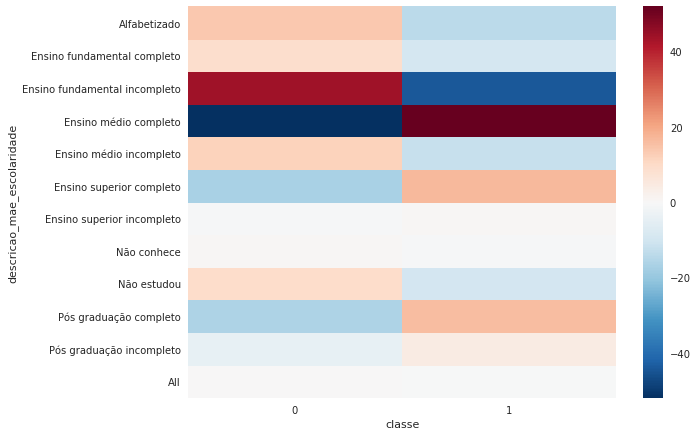

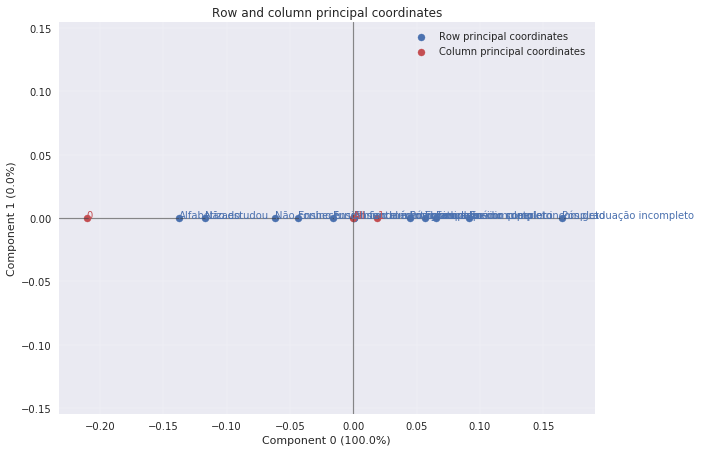

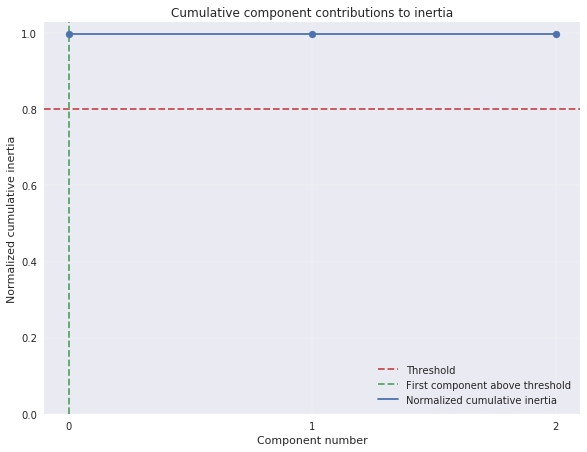

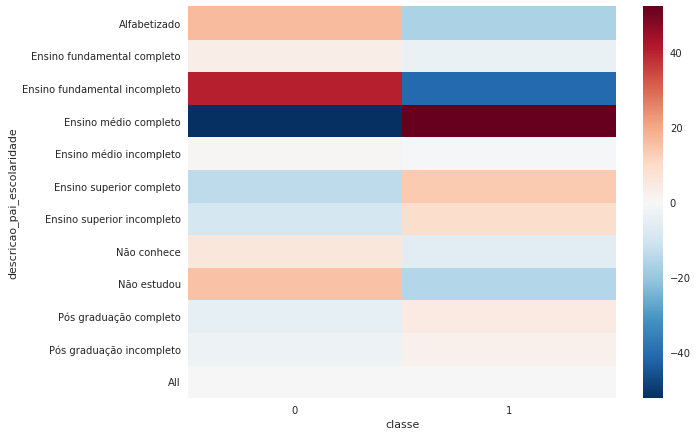

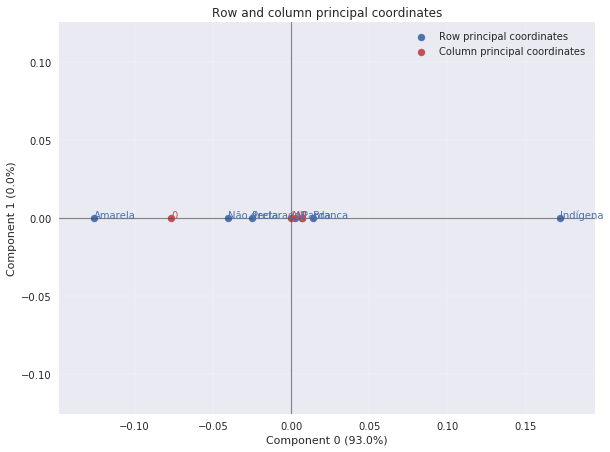

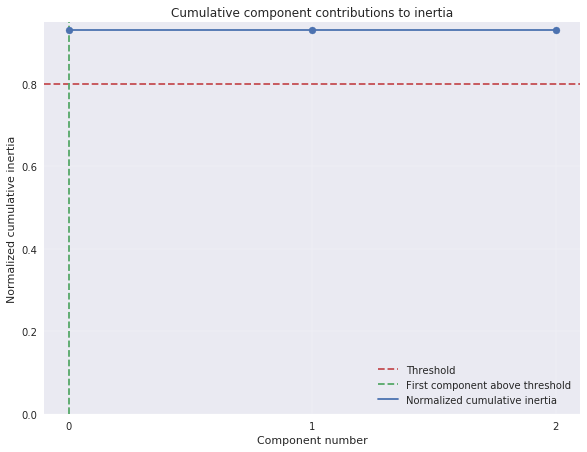

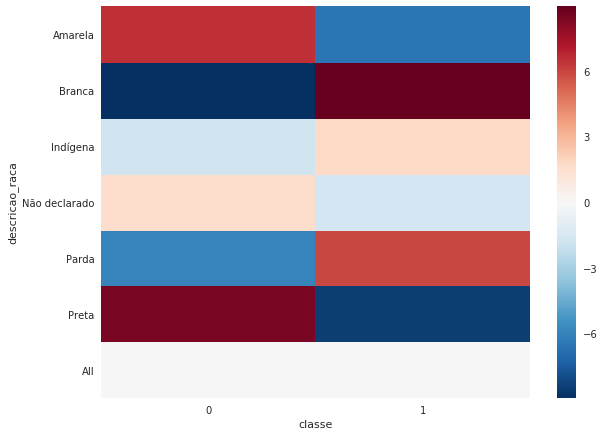

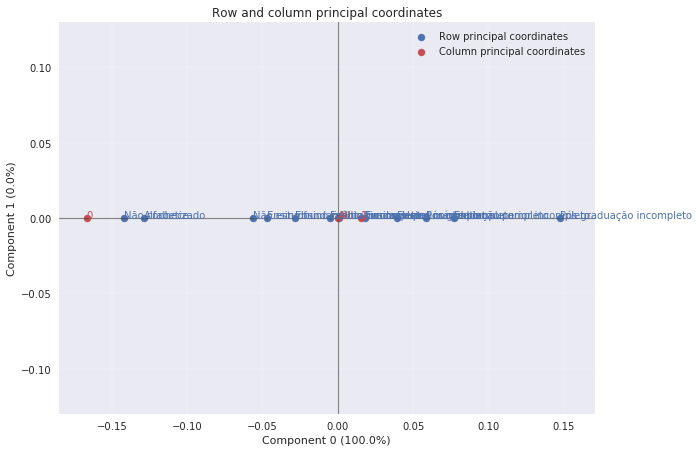

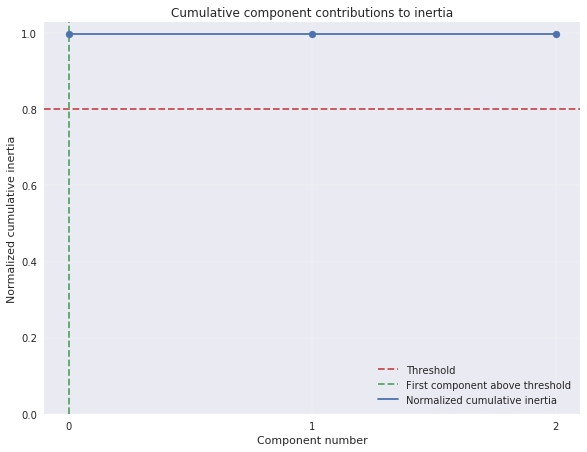

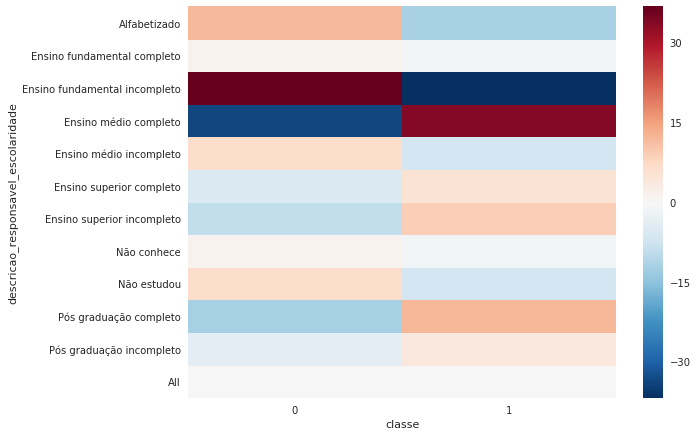

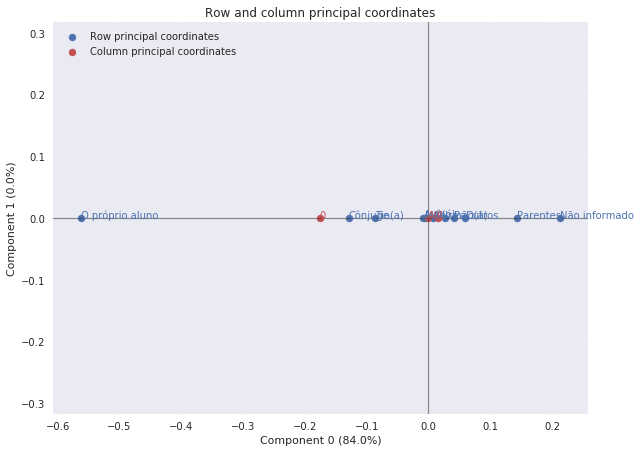

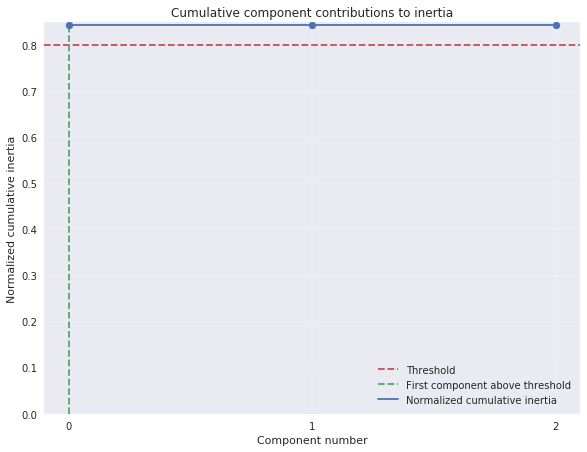

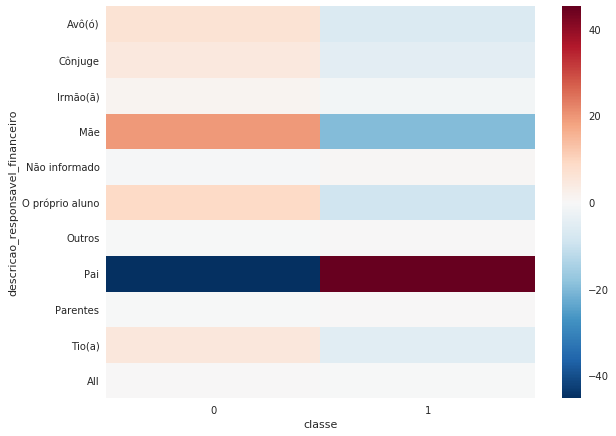

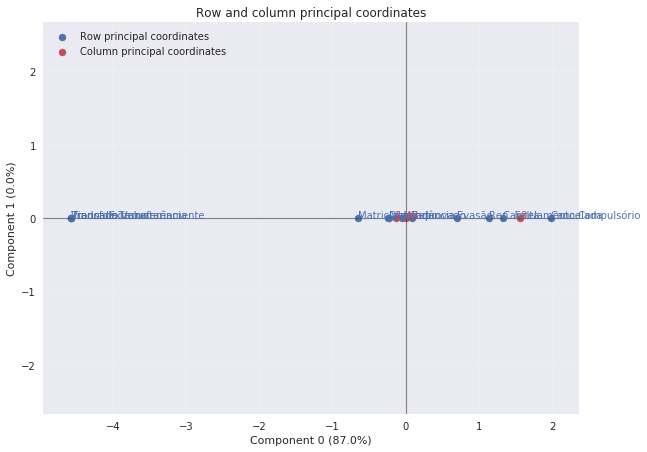

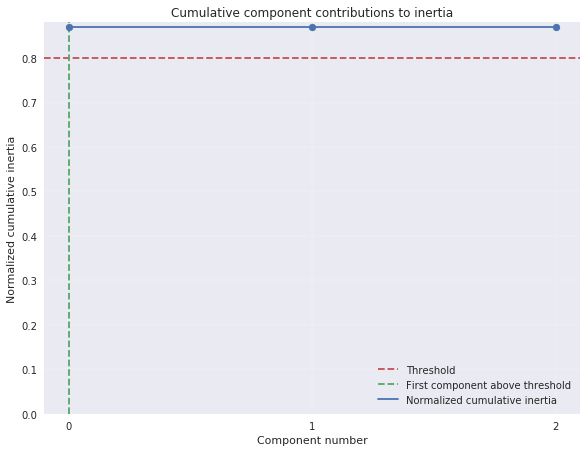

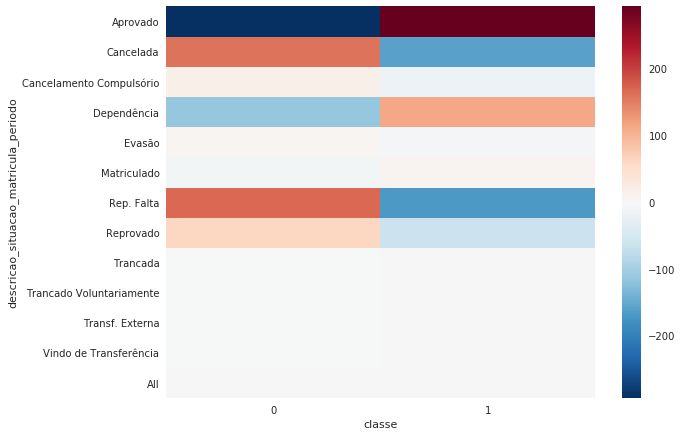

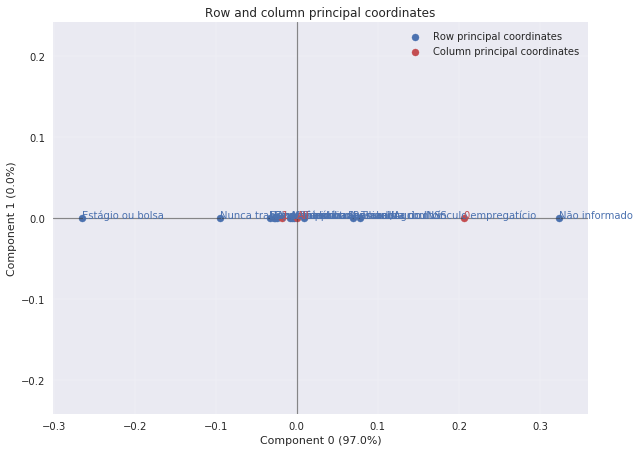

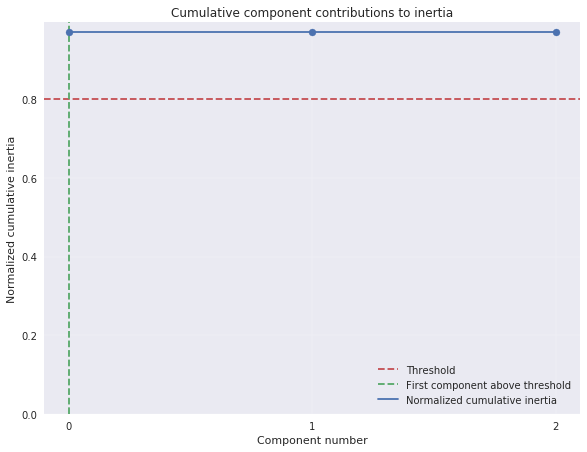

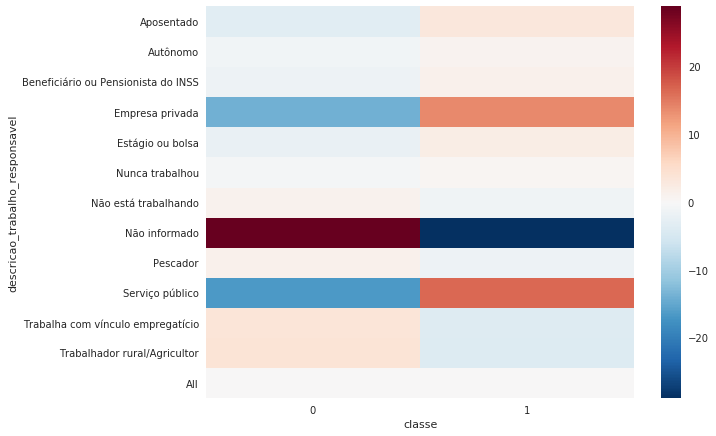

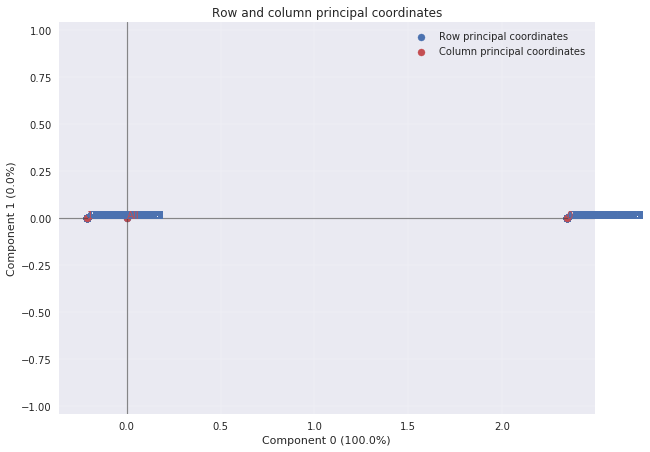

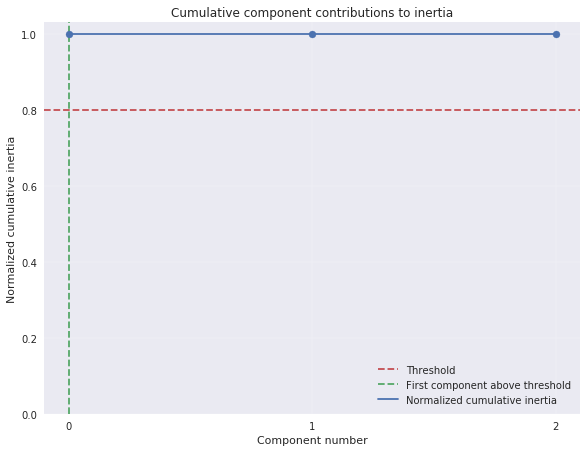

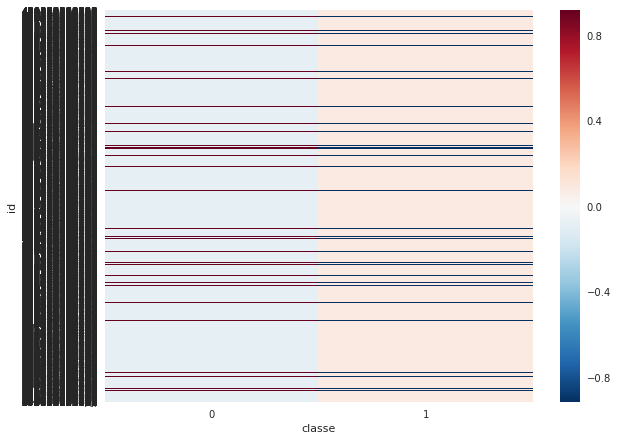

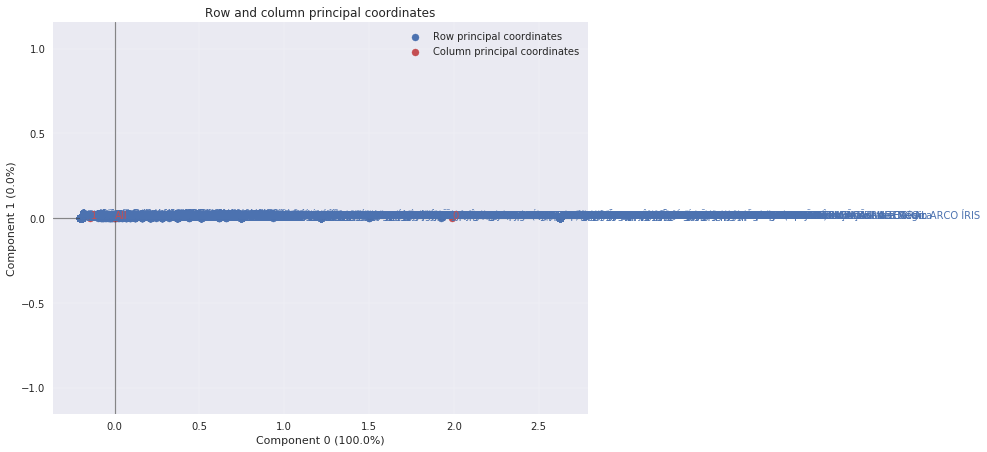

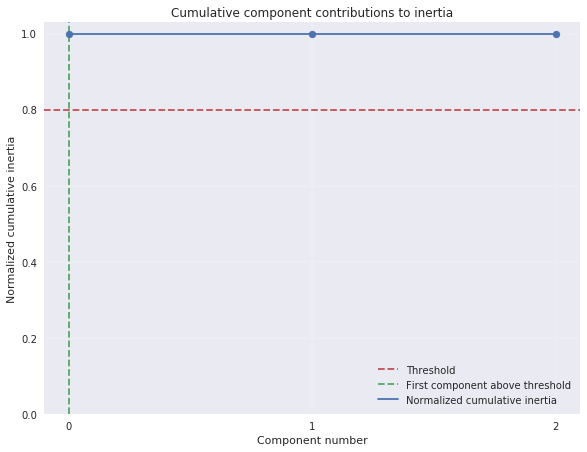

In [ ]:
for index1 in dados.columns:
    #print(index1)
    if index1 == 'classe':
        continue
    
    fig = plt.figure()
    #tabela de contigencia
    tbl = pd.crosstab(index = dados[index1], columns = dados.classe, margins=True)
    #print(tbl)

    #analise de correspondencia
    ca = prince.CA(tbl, n_components=-1)

    fig = plt.figure()
    fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)

    ca.plot_cumulative_inertia()

    #matriz residual
    res = (ca.P - ca.expected_frequencies) * ca.N
    #res

    f, ax = plt.subplots()
    df = res.drop(['All'], axis=1)
    sns.heatmap(df)
    
    #break

In [43]:
#removendo atributos que não traz ganho de informação
#ano_letivo__ano 
#ano_letivo__ano_matricula_periodo
dados = dados.drop(['ano_letivo__ano', 'ano_letivo__ano_matricula_periodo'], axis=1)

In [44]:
#descricao_area_residencial[nao informado, urbana], descricao_companhia_domiciliar[conjuge, outros, pais, parente(s) amigos(s)]
#descricao_historico[verificar melhor o caso de tecnico de nível médio em informática]
#descricao_imovel[alugado, cedido ou emprestado, financiado, nao informado]
#descricao_mae_escolaridade[ens fund inc, ens med compl, fazer por cidade]
#descricao_pai_escolaridade[ens fund inc, ens med completo, alfabetizado, nao estudou]
#descricao_raca[amarela, branca, parda, preta]
#descricao_responsavel_financeiro[mae, pai]
#descricao_trabalho_responsavel[empresa privada, nao informado, serviço público]
dados.columns

Index(['LnguaPortuguesaeLiteraturaI90H', 'LnguaPortuguesaeLiteraturaII90H',
       'MatemticaI120H', 'MatemticaII90H', 'cep', 'classe', 'descricao',
       'descricao_area_residencial', 'descricao_companhia_domiciliar',
       'descricao_historico', 'descricao_imovel', 'descricao_mae_escolaridade',
       'descricao_pai_escolaridade', 'descricao_raca',
       'descricao_responsavel_escolaridade',
       'descricao_responsavel_financeiro',
       'descricao_situacao_matricula_periodo',
       'descricao_trabalho_responsavel', 'id',
       'nome_escola_ensino_fundamental', 'percentual_frequencia',
       'pessoa_fisica__nascimento_data', 'pessoa_fisica__sexo', 'qnt_pc',
       'qtd_pessoas_domicilio', 'renda_bruta_familiar', 'sigla'],
      dtype='object')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


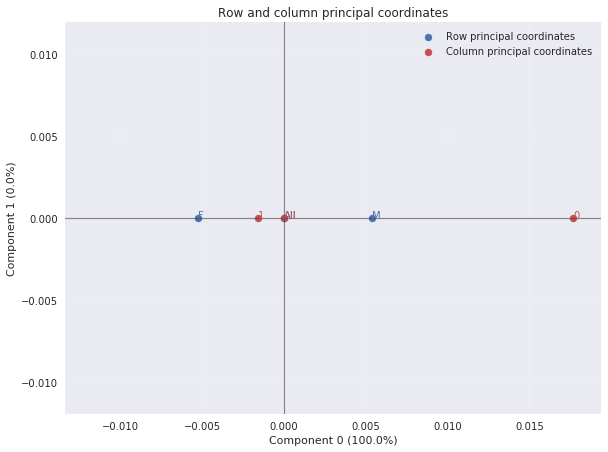

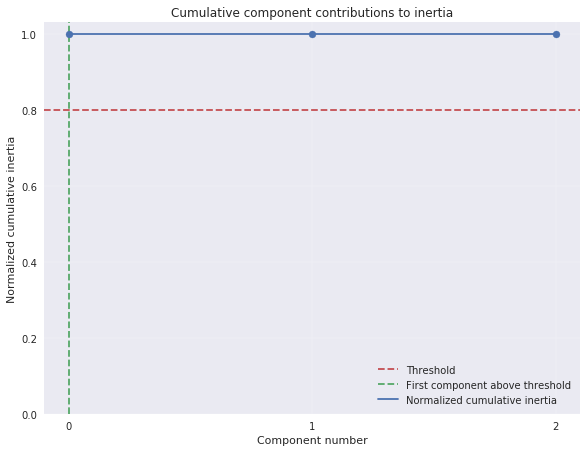

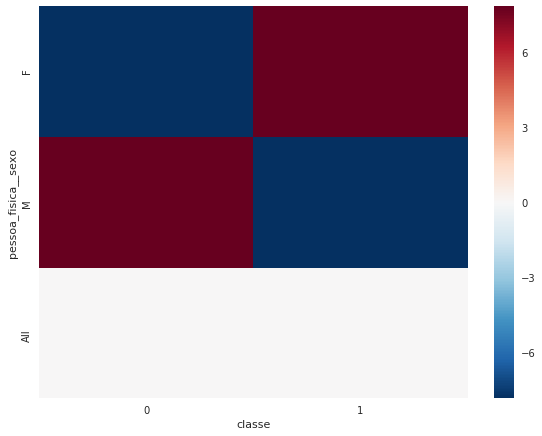

In [8]:
tbl = pd.crosstab(index = dados.pessoa_fisica__sexo, columns = dados.classe, margins=True)
#print(tbl)

#analise de correspondencia
ca = prince.CA(tbl, n_components=-1)

fig = plt.figure()
fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)

ca.plot_cumulative_inertia()

#matriz residual
res = (ca.P - ca.expected_frequencies) * ca.N
#res

f, ax = plt.subplots()
df = res.drop(['All'], axis=1)
sns.heatmap(df)

In [45]:
#'qtd_pessoas_domicilio', 'renda_bruta_familiar', 'sigla'
print(dados.shape)
print(dados[dados.classe==0].shape)

dados_filtrado = dados[dados.qtd_pessoas_domicilio < 12 ]
print(dados_filtrado.shape)
dados_filtrado[dados_filtrado.classe==0].shape

dados = dados_filtrado

(7520, 27)
(627, 27)
(7512, 27)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


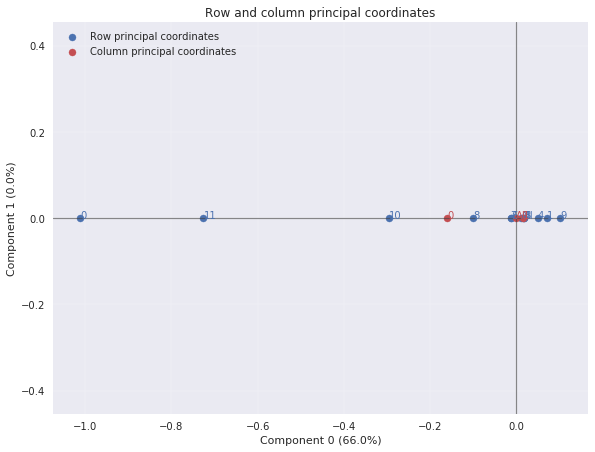

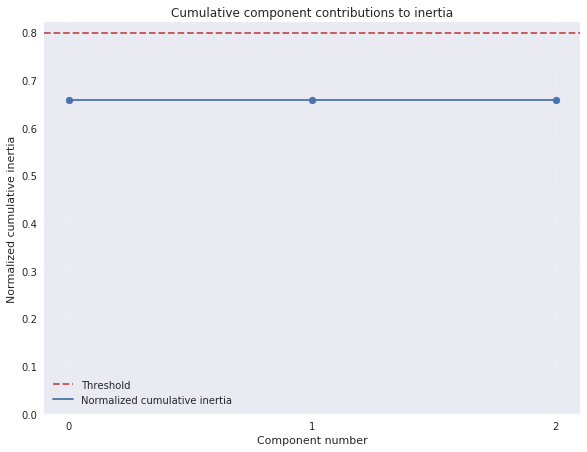

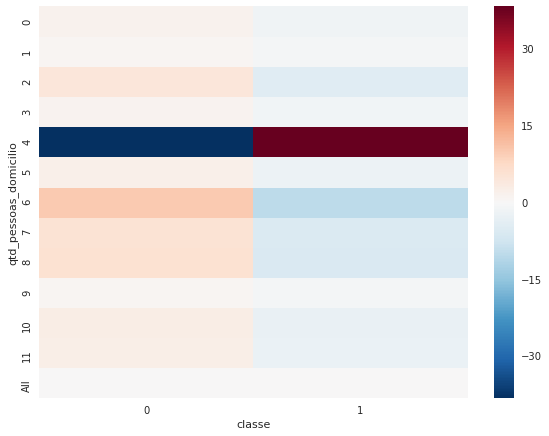

In [42]:
tbl = pd.crosstab(index = dados_filtrado.qtd_pessoas_domicilio, columns = dados_filtrado.classe, margins=True)
#print(tbl)

#analise de correspondencia
ca = prince.CA(tbl, n_components=-1)

fig = plt.figure()
fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)

ca.plot_cumulative_inertia()

#matriz residual
res = (ca.P - ca.expected_frequencies) * ca.N
#res

f, ax = plt.subplots()
df = res.drop(['All'], axis=1)
sns.heatmap(df)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


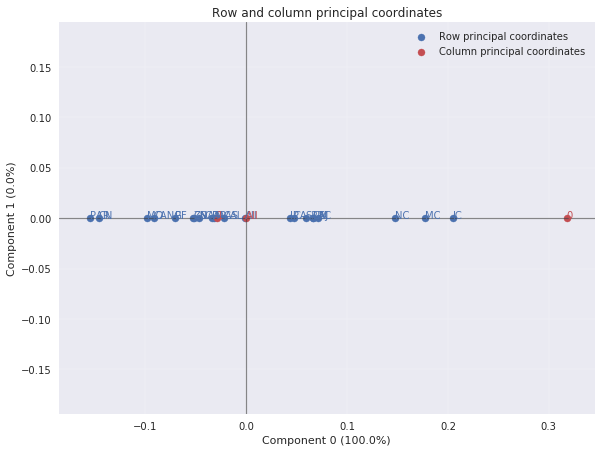

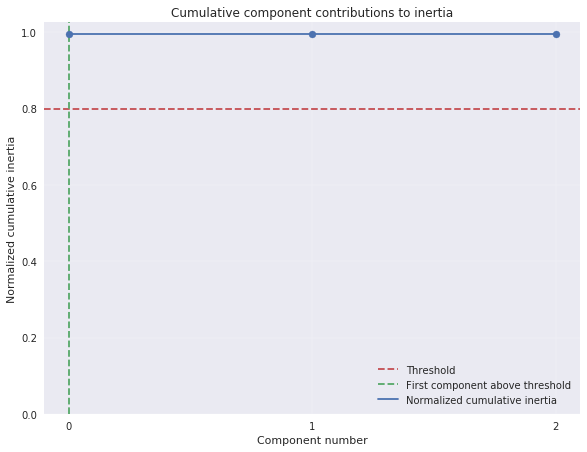

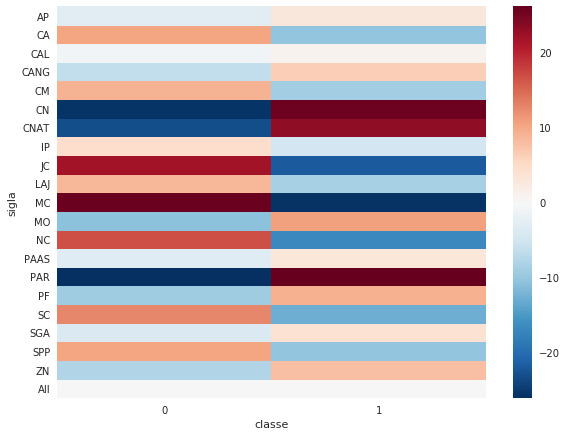

In [32]:
tbl = pd.crosstab(index = dados.sigla, columns = dados.classe, margins=True)
#print(tbl)

#analise de correspondencia
ca = prince.CA(tbl, n_components=-1)

fig = plt.figure()
fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)

ca.plot_cumulative_inertia()

#matriz residual
res = (ca.P - ca.expected_frequencies) * ca.N
#res

f, ax = plt.subplots()
df = res.drop(['All'], axis=1)
sns.heatmap(df)

In [57]:
print(dados.shape)
print(dados[dados.classe==0].shape)

dados_filtrado = dados[dados.qnt_pc < 4 ]
print(dados_filtrado.shape)
dados_filtrado[dados_filtrado.classe==0].shape

(7512, 27)
(624, 27)
(5697, 27)


(432, 27)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


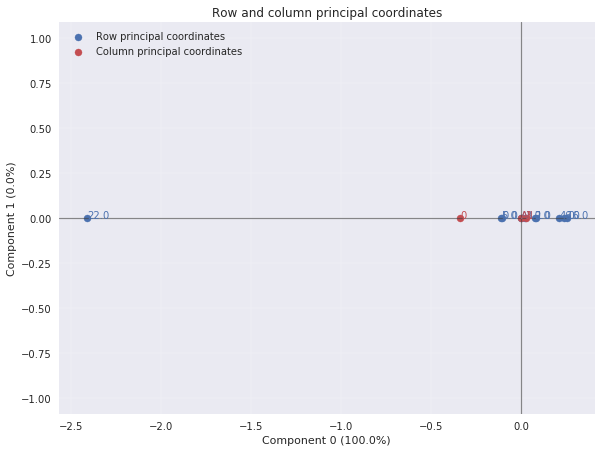

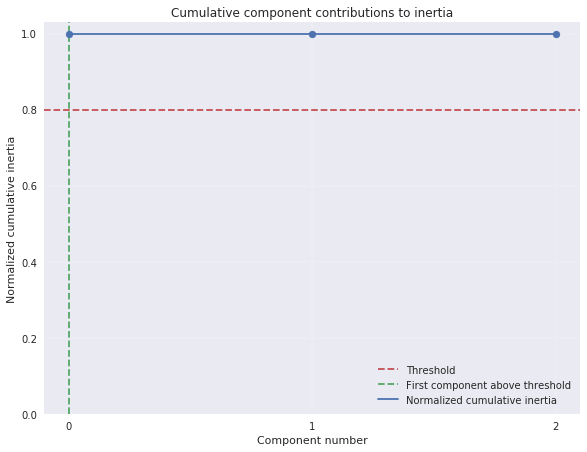

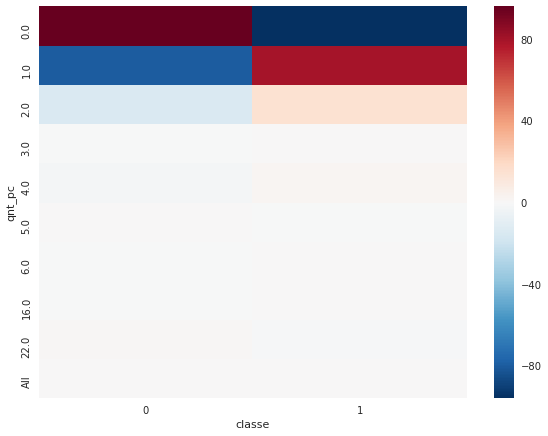

In [5]:
tbl = pd.crosstab(index = dados.qnt_pc, columns = dados.classe, margins=True)
#print(tbl)

#analise de correspondencia
ca = prince.CA(tbl, n_components=-1)

fig = plt.figure()
fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)

ca.plot_cumulative_inertia()

#matriz residual
res = (ca.P - ca.expected_frequencies) * ca.N
#res

f, ax = plt.subplots()
df = res.drop(['All'], axis=1)
sns.heatmap(df)

In [58]:
#a qualidade do atributo qnt_pc está ruim como visto acima
dados = dados.drop(['qnt_pc'], axis=1)

In [59]:
print(dados.shape)
print(dados[dados.classe==0].shape)

dados_filtrado = dados[dados.renda_bruta_familiar < 7000 ]
print(dados_filtrado.shape)
dados_filtrado[dados_filtrado.classe==0].shape

(7512, 26)
(624, 26)
(7201, 26)


(600, 26)

In [61]:
dados_filtrado['qnt_salario'] = round(dados_filtrado['renda_bruta_familiar'] / 937)

dados = dados_filtrado

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


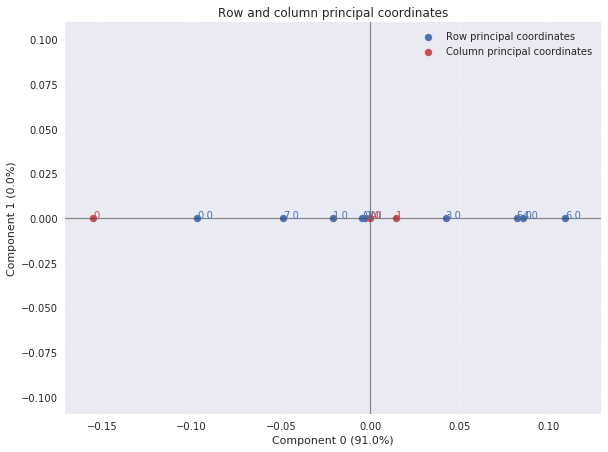

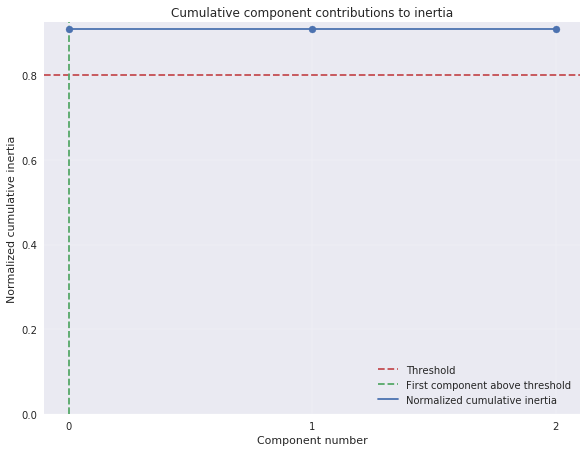

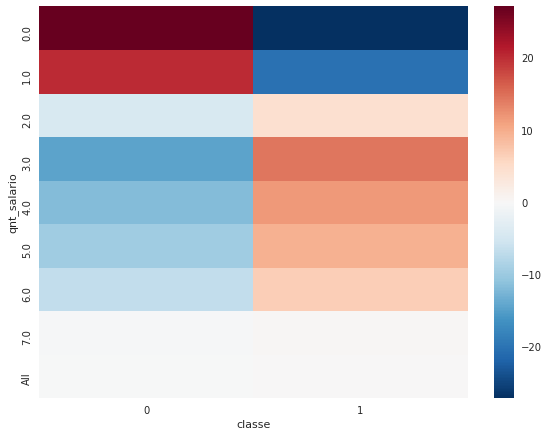

In [62]:
tbl = pd.crosstab(index = dados.qnt_salario, columns = dados.classe, margins=True)
#print(tbl)

#analise de correspondencia
ca = prince.CA(tbl, n_components=-1)

fig = plt.figure()
fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)

ca.plot_cumulative_inertia()

#matriz residual
res = (ca.P - ca.expected_frequencies) * ca.N
#res

f, ax = plt.subplots()
df = res.drop(['All'], axis=1)
sns.heatmap(df)

In [63]:
#salva os dados filtrados
dados.to_json("dados/dados_filtrado_CA.json")